# Анализ оттока клиентов 

**Дополнительные материалы:**
- [Ссылка на дашборд Tableau](https://public.tableau.com/views/_16741818787270/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link): распределение дохода клиентов в зависимости от наличия/отсутствия кредитной карты.

**Цель проекта**: определение на основе анализа портретов клиентов банка сегментов пользователей, которые склонны к прекращению использования банковских услуг.

**Заказчик**: банк «Метанпром» (Ярославская обл., города Ярославль, Ростов Великий и Рыбинск)

**Этапы реализации проекта:** 

[1) Подготовительный этап: обработка данных](#first_stage)

- [1.1. Загрузка библиотек, выгрузка данных, изучение общей информации о датафреймах](#general)

- [1.2. Предобработка данных: обработка наименований столбцов, предварительное описание данных (в том числе построение гистограмм), корректировка типов данных в столбцах, выявление и обработка пропусков, явных и неявных дубликатов, аномалий](#preprocessing)

- [1.3. Добавление дополнительных столбцов: кодировка города и пола, категоризация баланса, дохода, возраста, кредитного рейтинга](#columns_addition)

- [1.4. Вывод по этапу](#first_conclusion)

[2) Исследовательский анализ данных](#second_stage)

- [2.1. Создание часто используемых функций для построения столбчатых и круговых диаграмм, диаграмм с накоплением, гистограмм](#create_functions)

- [2.2. Характеристика клиентов банка: сравнение общей характеристики клиентов и клиентов, расторгнувших договор](#comparison)

- [2.2.1. Определение количества клиентов, расторгнувших договор](#comparison_number)

- [2.2.2. Характеристика пола клиентов, в т.ч. расторгнувших договор](#comparison_gender)

- [2.2.3. Характеристика городов проживания клиентов, в т.ч. расторгнувших договор](#comparison_city)

- [2.2.4. Характеристика возрастных групп клиентов, в т.ч. расторгнувших договор](#comparison_age)

- [2.2.5. Характеристика дохода клиентов, в т.ч. расторгнувших договор](#comparison_salary)

- [2.2.6. Характеристика объектов собственности клиентов, в т.ч. расторгнувших договор](#comparison_equity)

- [2.2.7. Характеристика использования продуктов клиентами, в т.ч. расторгнувшими договор](#comparison_products)

- [2.2.8. Характеристика использования кредитных карт клиентами, в т.ч. расторгнувшими договор](#comparison_cards)

- [2.2.9. Характеристика кредитного рейтинга клиентов, в т.ч. расторгнувших договор](#comparison_score)

- [2.2.10. Характеристика баланса клиентов, в т.ч. расторгнувших договор](#comparison_balance)

- [2.2.11. Характеристика активности клиентов, в т.ч. расторгнувших договор](#comparison_activity)

- [2.3. Вывод по этапу](#second_conclusion)

[3) Составление портретов клиентов, расторгнувших договор](#portray)

- [3.1. Выявление корреляции характеристик клиента и факта расторжения договора](#portray_churn_correlation)

- [3.2. Построение матрицы корреляций характеристик клиентов, расторгнувших договор](#portray_correlation)

- [3.3. Построение графиков для столбцов с выявленной корреляцией](#portray_correlation_plots)

- [3.4. Создание функций для сравнения характеристик и анализа соотношения долей в значениях (с различием в пропорциях не более 5%), построения круговых диаграмм, перебора характеристик](#portray_functions)

- [3.5. Сравнение характеристик ушедших клиентов по полу](#portray_gender)

- [3.6. Сравнение характеристик ушедших клиентов по городу](#portray_city)

- [3.7. Сравнение характеристик ушедших клиентов по отсутствию/наличию кредитной карты](#portray_card)

- [3.8. Сравнение характеристик ушедших клиентов по активности](#portray_activity)

- [3.9. Вывод по этапу](#third_conclusion)

[4) Проверка статистических гипотез](#hypothesis)

- [4.1. Проверка гипотезы: средние доходы мужчин и женщин, которые расторгли договор, равны](#hypothesis_salary_gender)

- [4.2. Проверка гипотезы: средний возраст ушедших клиентов, которые имели кредитную карту и которые не пользовались ей, равен](#hypothesis_age)

- [4.3. Проверка гипотезы: средний баланс клиентов, которые имели кредитную карту и которые не пользовались ей, равен](#hypothesis_balance)

- [4.4. Вывод по этапу](#fourth_conclusion)

[5) Сегментация на основе стратегических показателей](#segments)

- [5.1. Результат сегментирования](#segments_results)

[6) Выводы и рекомендации по проекту](#conclusion)

<a name="first_stage"> </a>
<a id="first_stage"> </a>
## Подготовительный этап: обработка данных

<a name="general"> </a>
<a id="general"> </a>
### Загрузка библиотек, выгрузка данных, изучение общей информации о датафреймах

In [1]:
#загружаем библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats as st
import math as mth

In [2]:
#создадим переменные, в которую поместим палитры для графиков
#установим тему для графиков

palette_1 = sns.cubehelix_palette(start=.3, rot=-.6, n_colors=15)
palette_2 = sns.color_palette("ch:s=-.2,r=.6", n_colors=15)
sns.set_theme(style="whitegrid", palette=palette_1)

In [3]:
#выгружаем датасет

try:
    df = pd.read_csv('C:/datasets/bank_scrooge.csv')

except:
    path = '/content/drive/MyDrive/datasets/bank_scrooge.csv'
    df = pd.read_csv(path)
    
df.head(5)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


**Структура датафрейма `df`**:

- `USERID` — идентификатор пользователя;
- `score` — баллы кредитного скоринга;
- `city` — город;
- `gender` — пол;
- `age` — возраст;
- `equity` — приблизительная оценка собственности клиента;
- `balance` — баланс на счёте;
- `products` — количество продуктов, которыми пользуется клиент;
- `credit_card` — есть ли кредитная карта;
- `last_activity` — был ли клиент активен последнее время;
- `EST_SALARY` — заработная плата клиента;
- `сhurn` — ушёл (1) или нет (0).

In [4]:
#выведем общую информацию о датафрейме

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


Датафрейм имеет размерность в 10 000 строк. Имеются пропуски только в столбце `balance`, данные в остальных столбцах совпадают с размерностью таблицы.
Большая часть данных имеет числовое значение (целое или плавающее с точкой, как кредитный рейтинг, баланс и доход), текстовые - только город и пол.

<a id="preprocessing"> </a>
<a name="preprocessing"> </a>
### Предобработка данных: обработка наименований столбцов, предварительное описание данных (в том числе построение гистограмм), корректировка типов данных в столбцах, выявление и обработка пропусков, явных и неявных дубликатов, аномалий

In [5]:
#ознакомимся с наименованиями столбцов 

df.columns

Index(['USERID', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn'],
      dtype='object')

In [6]:
#переведем наименования столбцов в нижний регистр
#добавим нижний пробел для соблюдения стиля

df.columns = [x.lower() for x in df.columns.values]

df.rename(columns = {'userid':'user_id'}, inplace = True)

df.head(3)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0


Более подробно изучим данные в каждом столбце.

In [7]:
#убедимся, что в текстовых столбцах присутствует только два пола и три города,
#как было заявлено в описании данных

for title in ['city', 'gender']:
    print(df[title].unique())

['Рыбинск' 'Ярославль' 'Ростов']
['Ж' 'М']


In [8]:
#проверим наличие явных дубликатов

df.duplicated().sum()

1

In [9]:
#выведем  информацию о дубликате

display(df[df.duplicated(keep=False)])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4343,141945,929.0,Ярославль,М,33,0,NaN,1,1,0,381868.89,0
9457,141945,929.0,Ярославль,М,33,0,NaN,1,1,0,381868.89,0


In [10]:
#удалим дубликат

df = df.drop_duplicates()
display(f'новое количество строк: {df.shape[0]}')
df.head(3)

'новое количество строк: 9999'

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0


In [11]:
#проверим, имеются ли в датафрейме повторяющиеся клиенты по id

'повторяющихся user_id:', df.shape[0] - df['user_id'].nunique()

('повторяющихся user_id:', 72)

In [12]:
#выведем первые 30 строк повторений

df[df.duplicated(['user_id'], keep=False)].sort_values(by=['user_id', 'churn']).head(30)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7694,116540,887.0,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
1893,116540,883.0,Ярославль,Ж,55,1,362756.49,3,0,1,175920.48,1
7542,117943,880.0,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
8638,123461,934.0,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0
1411,123461,829.0,Рыбинск,Ж,59,0,96222.44,2,0,1,102771.55,1
9775,124450,758.0,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0
8164,124450,859.0,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1


Данные показали совпадения 72 id пользователей. Однако, при более детальном знакомстве с данными можно предположить, что **это разные клиенты ввиду различия такой информации, как кредитный рейтинг, возраст, размер дохода и т.д.** Кроме того, в большинстве пар дубликатов **имеется чередование 0 и 1 в столбце `churn`, что может говорить о том, что id старых клиентов, которые перестали пользоваться услугами банка, просто были присвоены новым пользователям**. Следовательно, мы не будем считать неявными дубликатами совпадение пользовательских идентификационных номеров. 

In [13]:
#опишем все столбцы с числовыми данными, чтобы выявить потенциальные аномалии

df.loc[:, 'score':'churn'].describe()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9999.000000,9999.000000,9999.000000,7.705000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000
mean,848.691369,42.838084,2.627863,8.277943e+05,1.874187,0.680368,0.523552,1.478435e+05,0.182218
std,65.446864,12.128714,1.980761,1.980614e+06,0.799938,0.466357,0.499470,1.393758e+05,0.386044
min,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,802.000000,34.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525178e+04,0.000000
50%,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196547e+05,0.000000
75%,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.744997e+05,0.000000
max,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


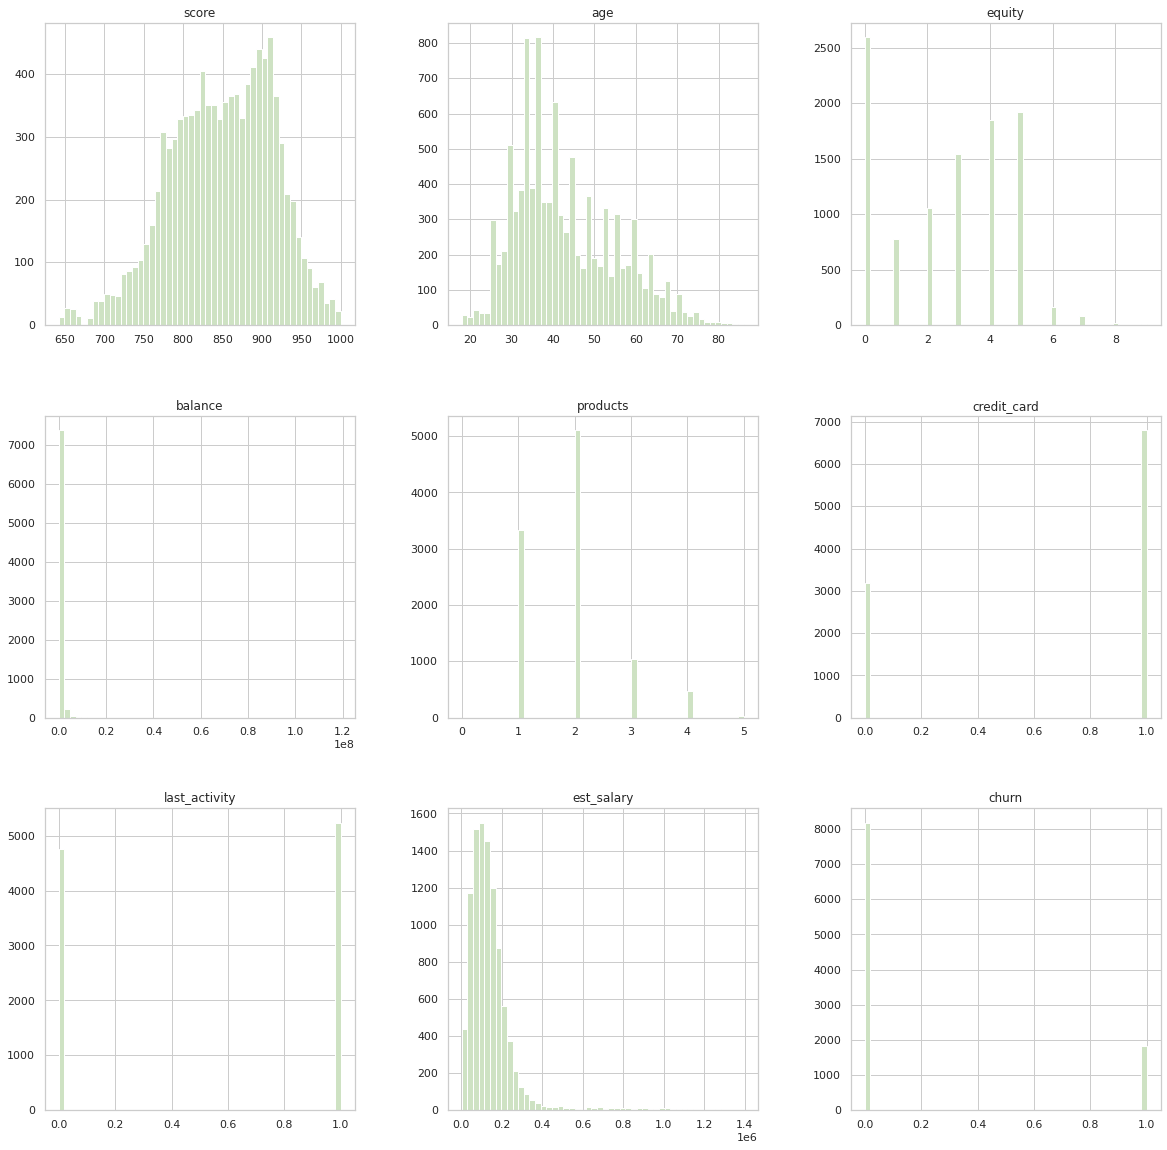

In [14]:
#построим гистограммы по всем столбцам с числовыми данными

df.loc[:, 'score':'churn'].hist(bins=50, figsize=(20, 20));

- Столбец `score`.
    Самый низкий кредитный рейтинг в данном столбце равен 642, самый высокий - значению 1000. Подавляющая часть клиентов имеет рейтинг в пределах 770-920 баллов. 

- Столбец `age`.
    Самому младшему клиенту банка исполнилось 18 лет, самый старший перешагнул порог в 86 лет. Самый популярный возраст клиентов - 30-40 лет. 
    
- Столбец `equity`.
    По оценкам банка, предположительно, большинство клиентов не имеют собственности. Однако, довольно распространены такие показатели, как 3-5 объектов.
    
- Столбец `balance`.
    Столбец имеет достаточно большое количество пропусков, вероятно наличие аномалий - слишком больших сумм на счетах. Обратим на данный столбец внимание далее.

- Столбец `products`.
    Большинство клиентов пользуются двумя продуктами банка. Однако, описание данных говорит о том, что имеется некое количество клиентов, у которых не зарегистрировано ни одного продукта. 
    
- Столбцы `credit_card`, `last_activity`, `churn`.
    Данные столбцы не имеют аномалий: значения в них равный или 0, или 1. Клиенты чаще имеют, чем не имеют кредитные карты, а в базе больше информации об активных пользователях, нежели тех, кто давно не совершал действий. Около 2000 клиентов, которые внесены в базу, ушли из банка.
    
- Столбец `est_salary`.
    Данный столбец также имеет подозрения на аномалии: есть клиенты, которые получают 2,5 тысячи, но имеются и миллионеры. 
    
Далее рассмотрим более детально столбцы с возможными аномалиями.

In [15]:
#уточним количество пропусков в столбце balance

df['balance'].isna().sum()

2294

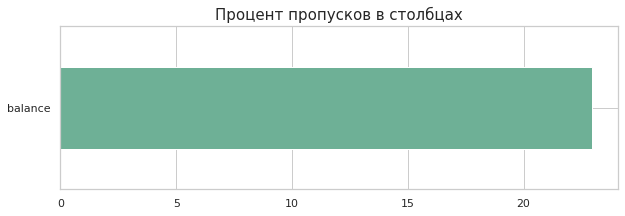

In [16]:
#визуализируем пропуск в столбце balance в процентном соотношении

ax = (
    (df.isna().mean()*100)
    .to_frame()
    .rename(columns = {0:'space'})
    .query('space > 0')
    .sort_values(by = 'space', ascending = True)
    .plot(kind= 'barh', y='space', figsize=(10,3), legend = False,
         color=palette_1[5:])
    .set_title('Процент пропусков в столбцах', fontsize=15)
     )

В столбце с данными по балансу пропуски составляют почти 25 процентов. 

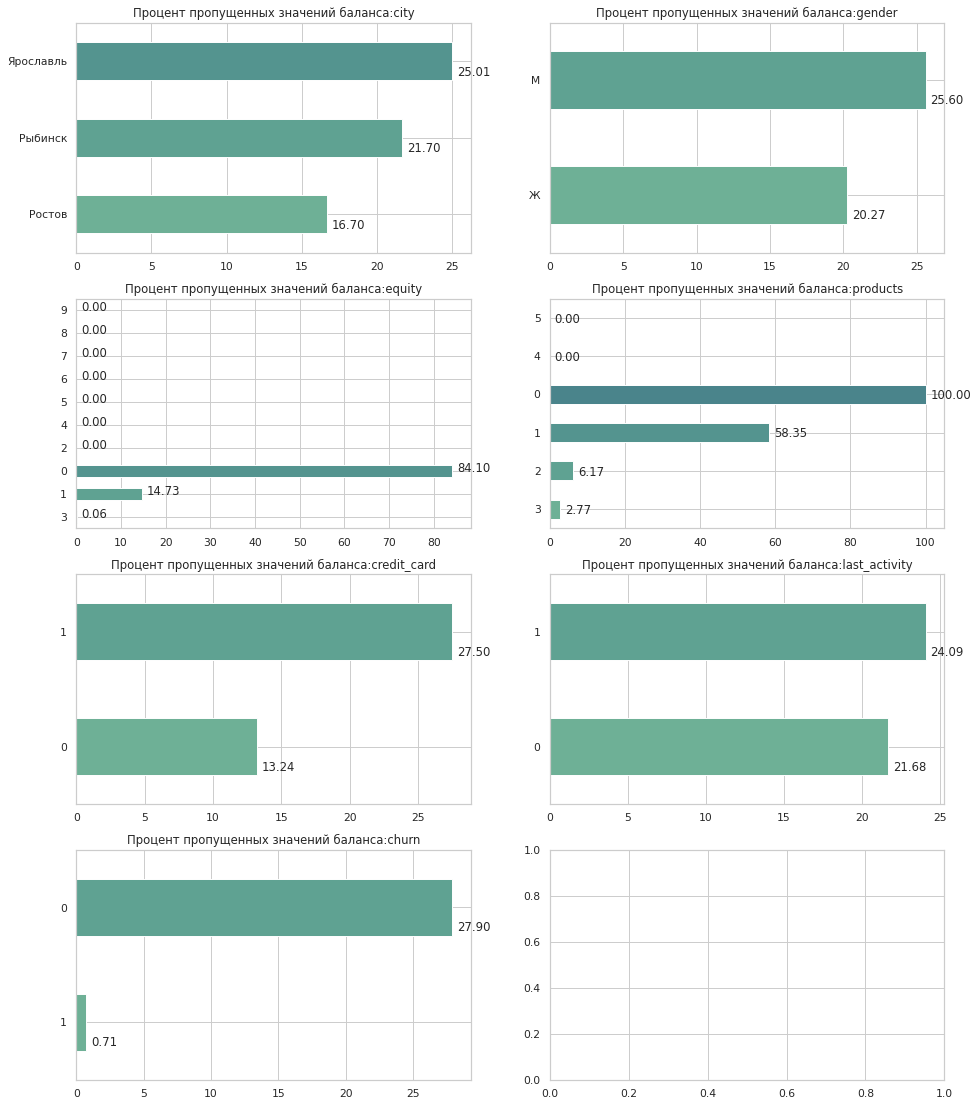

In [17]:
#проверим, в каких категориях чаще всего имеются пропуски
#возьмем укрупненные категории за исключением возраста, рейтинга, дохода 

fig, axes = plt.subplots(4, 2, figsize=(16, 20), dpi=70)

for i, ax in zip(['city', 
                  'gender', 
                  'equity', 
                  'products', 
                  'credit_card',
                  'last_activity', 
                  'churn'], axes.flat):
    (df[df['balance'].isna()][i].value_counts() \
         / df[i].value_counts() * 100).sort_values()\
        .plot(kind='barh', color=palette_1[5:], ax=ax)
    ax.set_title(f'Процент пропущенных значений баланса:{i}', fontsize=12)
    
    for p in ax.patches:    
        ax.annotate("%.2f" % p.get_width(),
                    (p.get_x() + p.get_width(), 
                     p.get_y()), xytext=(5, 5), 
                    textcoords='offset points')

Согласно графикам, наибольший процент пропусков характерен для клиентов, которые не имеют продуктов (100%) или тех, у кого один продукт (около 60% - например, у клиента может быть страховка в банке, без баланса), а также для пользователей, у которых предположительно нет объектов в собственности (свыше 84%). По остальным категориям процент пропусков составляет не более 28 процентов.

Следовательно, учитывая столь большой объем пропущенных данных, а также возможную зависимость пропуска с отсутствием у клиента баланса в банке и использованием других банковских услуг, данный столбец будет оставлен без изменений в отношении пропусков.

In [18]:
#проверим, много ли в датасете клиентов с нулевым балансом

len(df.query('balance == 0'))

2

In [19]:
#таких клиентов всего 2:
#заполним пропуски в столбце balance нулевым значением, 
#чтобы использовать его для расчетов без ошибок

df['balance'] = df['balance'].fillna(0)

#проверим результат

df['balance'].isna().sum()

0

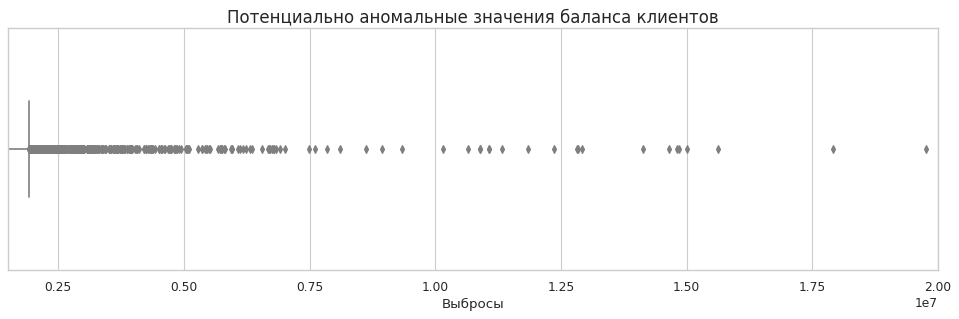

In [20]:
#построим диаграмму размаха, чтобы выявить потенциально аномальные суммы баланса

plt.figure(figsize=(15, 4), dpi=80)
sns.boxplot(x='balance', data=df)
plt.title('Потенциально аномальные значения баланса клиентов', fontsize=15)
plt.xlabel('Выбросы')

#зададим левый предел в районе 1,5 млн рублей
plt.xlim(1500000, 20000000);

Диаграмма размаха показывает, что значения свыше 2 миллионов рублей уже считаются аномальными, однако, наличие баланса до примерно 7 млн. рублей встречается достаточно часто, более этого значения - уже в единичных количествах. 

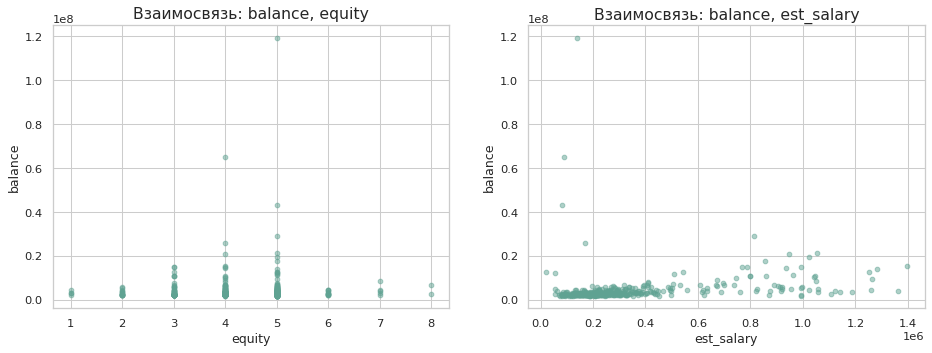

In [21]:
#проверим, имеется ли корреляция между высоким балансом и объектами/доходом

fig, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=75)

for i, ax in zip(['equity', 'est_salary'], axes.flat):
     (df.query('balance > 2000000').plot(x=i, y='balance', 
          kind='scatter', alpha=0.5, grid=True, \
         color=palette_1[6:7], ax=ax) )
     ax.set_title(f'Взаимосвязь: balance, {i}', fontsize=15);

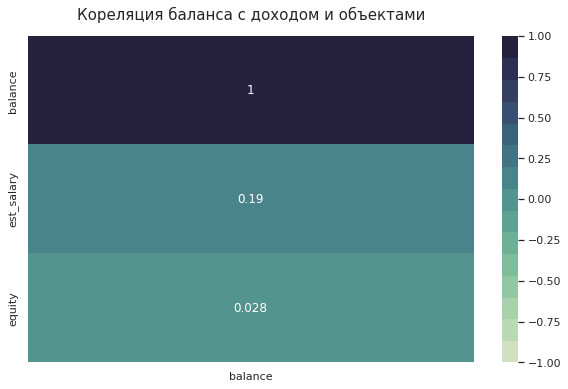

In [22]:
#отобразим корреляцию баланса с доходами и объектами

plt.figure(figsize=(10, 6))

salary_df = df.loc[:, ['balance', 'est_salary', 'equity']].query('balance > 2000000')
                   
heatmap = (
    sns
    .heatmap(salary_df.corr()[['balance']]
             .sort_values(by='balance', ascending=False), 
             vmin=-1, 
             vmax=1, 
             annot=True, 
             cmap=palette_1)
)

heatmap.set_title('Кореляция баланса с доходом и объектами', fontdict={'fontsize': 15}, pad=16);

Коэффициент Пирсона не выявил наличия корреляции между балансом, доходом и объектами собственности. Согласно графикам, чаще всего имеют высокий баланс клиенты, у которых 4-5 объектов.  

In [23]:
#выведем, какой процент от датасета составляют пользователи с высоким балансом 

display(f"Клиентов с балансом выше 2 млн.р: {df.query('balance > 2000000').shape[0]} человек")
display(f"Процент от всех клиентов: {round(df.query('balance > 2000000').shape[0] / df.shape[0] * 100, 2)}%")

'Клиентов с балансом выше 2 млн.р: 428 человек'

'Процент от всех клиентов: 4.28%'

Клиенты с высоким балансом составляют более 4% всех пользователей. С одной стороны, высокий или низкий баланс не говорит прямо о состоятельности клиента: у нас нет данных о движении средств, отсутствует информация о том, за какой период или за какой момент времени представлены данные, а также какой именно счет (дебетовый, кредитный, ипотечный и т.д.) представлен в данных. Вполне вероятно, что у люди с высоким доходом могут не хранить деньги на банковском счете, или, напротив, клиенты среднего класса могут получить большую сумму на счет c продажи квартиры. 

Таким образом, удалим только особо высокие значения: от 7,5 млн и выше, которые встречаются уже в единичных случаях.

In [24]:
#удалим аномально клиентов с особо высоким балансом

display(f'количество строк перед удалением: {df.shape[0]}')

for i in df.query('balance > 7500000').index:
    df = df.drop(i,axis = 0)
    
f'новое количество строк: {df.shape[0]}'

'количество строк перед удалением: 9999'

'новое количество строк: 9966'

In [25]:
#выведем клиентов, у которых нет продуктов в банке

df.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79,3,0.0,0,0,0,25063.96,1


Удалим такого пользователя, поскольку он мог попасть в базу по ошибке: у всех клиентов, в том числе которые ушли, был как минимум один продукт, что, собственно, является основой для возникновения отношений между банком и пользователем его услуг. Т.е. если у клиента нет продуктов, значит, он не может считаться клиентом банка. Если рассматривать в теории, что клиент закрыл все свои продукты перед уходом, то тогда у всех ушедших клиентов должны быть нули в столбце `products`, т.к. продукты также закрываются автоматически после расторжения договора.

In [26]:
#удаляем клиента без продуктов

display(f'количество строк перед удалением: {df.shape[0]}')

df = df.drop(8957, axis = 0)
    
f'новое количество строк: {df.shape[0]}'

'количество строк перед удалением: 9966'

'новое количество строк: 9965'

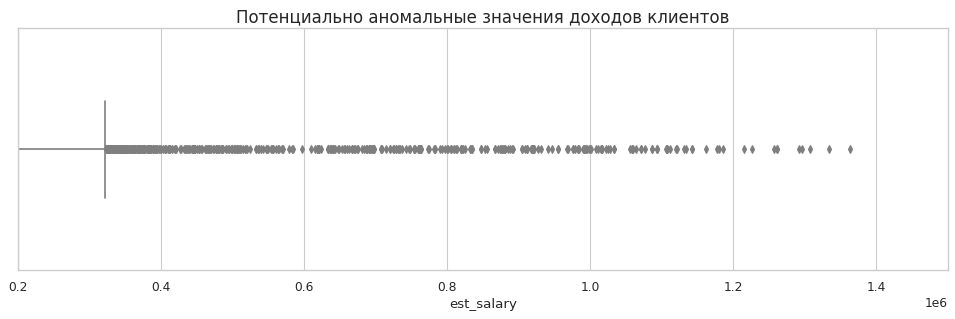

In [27]:
#проверим на аномалии клиентов с особо высоким доходом

plt.figure(figsize=(15, 4), dpi=80)
sns.boxplot(x='est_salary', data=df)
plt.title('Потенциально аномальные значения доходов клиентов', fontsize=15);

#зададим левый предел в районе 200 тысяч рублей
plt.xlim(200000, 1500000);

Согласно диаграмме размаха, доход свыше примерно 350 тысяч рублей является аномальной. Встречаются отдельные случаи вплоть до 1,4 млн рублей.

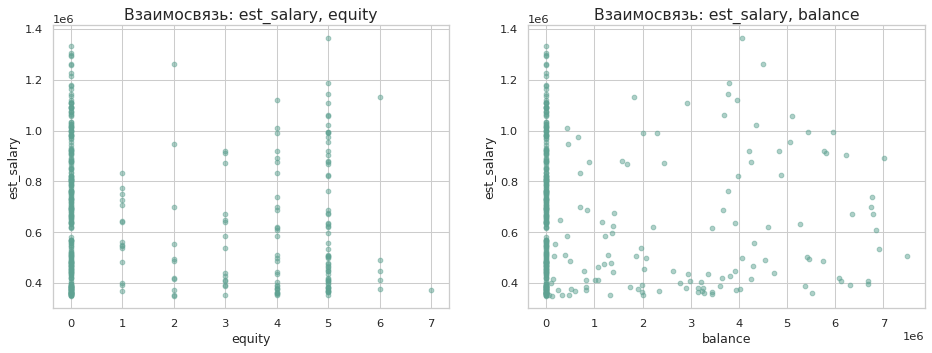

In [28]:
#проверим, имеется ли корреляция между доходом и объектами/балансом

fig, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=75)

for i, ax in zip(['equity', 'balance'], axes.flat):
     (df.query('est_salary > 350000').plot(x=i, y='est_salary', 
          kind='scatter', alpha=0.5, grid=True, \
         color=palette_1[6:7], ax=ax) )
     ax.set_title(f'Взаимосвязь: est_salary, {i}', fontsize=15);

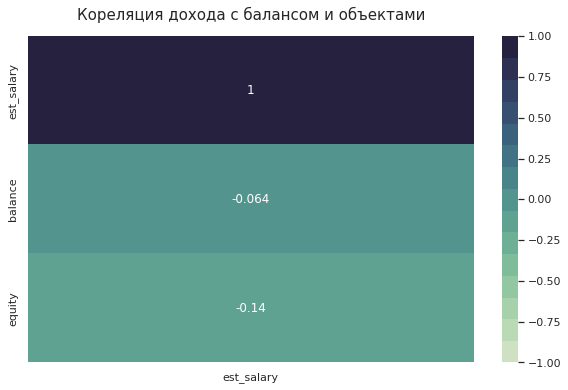

In [29]:
#отобразим корреляцию дохода с балансом и объектами для клиентов с высоким доходом

plt.figure(figsize=(10, 6))

salary_df = df.loc[:, ['balance', 'est_salary', 'equity']].query('est_salary > 350000')
                   
heatmap = (
    sns
    .heatmap(salary_df.corr()[['est_salary']]
             .sort_values(by='est_salary', ascending=False), 
             vmin=-1, 
             vmax=1, 
             annot=True, 
             cmap=palette_1)
)

heatmap.set_title('Кореляция дохода с балансом и объектами', fontdict={'fontsize': 15}, pad=16);

Согласно полученным результатам, по шкале Чеддока у клиентов с высоким доходом отсутствует корреляция между доходом, балансом и объектами. Наибольший доход имеют либо те, у кого нет объектов, либо те клиенты, которые имеют сразу пять объектов, а также клиенты, у которых нет данных по балансу. 

In [30]:
#уточним, какой процент составляют состоятельные клиенты, у которых нет данных по балансу

na_balance = round(df.query('est_salary > 350000 and balance == 0').shape[0] /\
                   df.query('est_salary > 350000').shape[0] * 100, 2)

display(f"Процент клиентов с высоким доходом без данных по балансу: {na_balance}%")


'Процент клиентов с высоким доходом без данных по балансу: 67.27%'

In [31]:
#выведем, какой процент от датасета составляют пользователи с высоким доходом

salary_above_350 = df.query('est_salary > 350000').shape[0]
display(f"Клиентов с доходом выше 350 тыс.р: {salary_above_350} человек")
display('Процент от всех клиентов: {:.2%}'.format(salary_above_350 / df.shape[0]))

'Клиентов с доходом выше 350 тыс.р: 385 человек'

'Процент от всех клиентов: 3.86%'

Состоятельные клиенты с точки зрения дохода составляют почти 4% датафрейма. Для более 67% таких клиентов отсутствуют данные по балансу. Значительная часть этих клиентов также не имеет объектов в собственности (напомним, что данный критерий также является относительным). Учитывая, что критерий дохода также имеет оценочный характер, на текущий момент сложно установить обоснованность таких посчетов расчетов, ввиду этого, примем за аномалии тех клиентов с высоким доходом, у которых нет данных о балансе или отсутствует недвижимость, чтобы сократить количество выбросов в датафрейме. 

In [32]:
#удалим аномальных клиентов с высоким доходом

display(f'количество строк перед удалением: {df.shape[0]}')

for i in df.loc[(df['est_salary'] > 350000) & ((df['balance'].isna()) | (df['equity'] == 0))].index:
    df = df.drop(i,axis = 0)
    
f'новое количество строк: {df.shape[0]}'

'количество строк перед удалением: 9965'

'новое количество строк: 9717'

Общая гистограмма показала, что в столбце `score`, имеющем формат float, вероятно, отсутствуют дробные значения. Убедимся, что это так и приведем столбец к целочисленному типу.

In [33]:
#проверим, есть ли в столбце дробные значения, отличные от нуля

(df['score'].astype(str).str.split('.').str[1]).unique()

array(['0'], dtype=object)

In [34]:
#изменим тип столбца на int

df['score'] = df['score'].astype(int)
df['score'].dtypes

dtype('int64')

<a id="columns_addition"> </a>
<a name="columns_addition"> </a>
### Добавление дополнительных столбцов: кодировка города и пола, категоризация баланса, дохода, возраста, кредитного рейтинга

В рамках данного этапа мы создадим два типа столбцов:
- столбцы для кодировки данных по городу и полу, т.е. введем вместо текстового описания фиктивные переменные, которые можно будет использовать для численного анализа;
- сгруппируем данные по столбцам с большим количеством данных, таким как `balance`, `est_salary`, `equity`, `score`, `age` и `products`, для удобства оценки определенных групп клиентов.

In [35]:
#для кодировки данных по полу и городу используем модуль sklearn.preprocessing

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df['enc_gender'] = ord_enc.fit_transform(df[['gender']]).astype(int)
df['enc_city'] = ord_enc.fit_transform(df[['city']]).astype(int)
df.head(11)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,enc_gender,enc_city
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,107683.34,0,0,1
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,2
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,1,2
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,1,1
6,177259,807,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0,0,2
7,218868,825,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0,0,2
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,1,2
9,133130,906,Ярославль,Ж,67,0,0.00,1,0,1,238055.53,0,0,2


По итогам кодирования создано два столбца:
- `enc_gender`, где 0 - женский пол, 1 - мужской пол;
- `enc_city`, в котором 0 - Ростов, 1 - Рыбинск, 2 - Ярославль

Эти столбцы пригодятся нам позднее для построения диаграмм (будут созданы единые функции, которые принимают числовые значения).

С целью подсчета среднего и корреляции для пола и возраста также создадим фиктивные переменные через get_dummies на основе копий столбцов, чтобы не потерять данные. По итогам создания появятся столбцы по каждому городу и полу, в которых будут два значения: 0 и 1. Единица будет соответствовать, что в строке содержится соответствующая информация.

In [36]:
#создадим копии столбцов age и city

df['city_2'] = df['city']
df['gender_2'] = df['gender']

df.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,enc_gender,enc_city,city_2,gender_2
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,Рыбинск,Ж
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,Рыбинск,Ж
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,107683.34,0,0,1,Рыбинск,Ж
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,2,Ярославль,Ж
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,1,2,Ярославль,М


In [37]:
#применим функцию get_dummies для создания фиктивных переменных для пола

df = pd.get_dummies(df, columns=['gender_2'], drop_first=False)
df.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,enc_gender,enc_city,city_2,gender_2_Ж,gender_2_М
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,Рыбинск,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,Рыбинск,1,0
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,107683.34,0,0,1,Рыбинск,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,2,Ярославль,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,1,2,Ярославль,0,1


In [38]:
#применим функцию get_dummies для создания фиктивных переменных для города

df = pd.get_dummies(df, columns=['city_2'], drop_first=False)
df.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,enc_gender,enc_city,gender_2_Ж,gender_2_М,city_2_Ростов,city_2_Рыбинск,city_2_Ярославль
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,1,0,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,1,0,0,1,0
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,107683.34,0,0,1,1,0,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,2,1,0,0,0,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,1,2,0,1,0,0,1


In [39]:
#переименуем столбцы для соблюдения единого стиля

df = df.rename(columns={'gender_2_Ж': 'female', 
                        'gender_2_М': 'male', 
                        'city_2_Ростов': 'rostov', 
                        'city_2_Рыбинск': 'rybinsk', 
                        'city_2_Ярославль': 'yaroslavl'})
df.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,enc_gender,enc_city,female,male,rostov,rybinsk,yaroslavl
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,1,0,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,1,0,0,1,0
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,107683.34,0,0,1,1,0,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,2,1,0,0,0,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,1,2,0,1,0,0,1


При разделении столбца `balance` на категории необходимо учесть большое количество пропусков, а также низкие значения баланса клиентов, которые предпочитают не держать (или, по крайней мере в момент выгрузки не держали) большой суммы денег на счете. 

In [40]:
#напомним, какое количество пропусков содержит данный столбец

len(df.query('balance == 0'))

2049

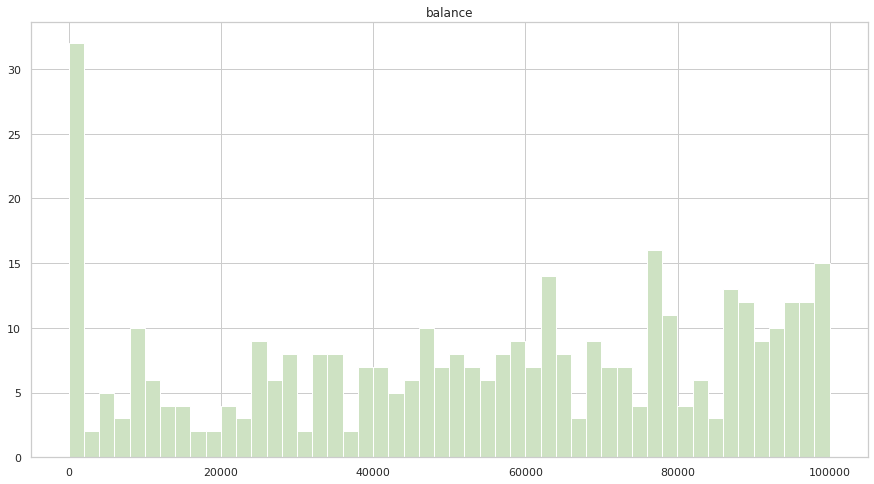

In [41]:
#выведем часть гистограммы данного столбца,
#чтобы определить, какие значения баланса можно считать низкими 

df.query('0 < balance < 100000').hist(column='balance', bins=50, figsize=(15,8));

Значительная часть данных сосредоточилась вблизи нулевых значений. В целом данные не отличаются столь большим разбросом, однако после отметки в 20 тысяч график (за исключением ряда значений) более высокие параметры встречаются чаще, намечается рост. Примем сумму в 20 тысяч как условную отметку для крайне низкого баланса.

In [42]:
#определим, какой объем данных приходится на данную категорию

len(df.query('balance < 20000'))

2119

In [43]:
#определим четверти данных за пределами данной суммы

df.query('balance > 20000')['balance'].describe()

count    7.598000e+03
mean     7.550825e+05
std      7.627722e+05
min      2.037410e+04
25%      3.011295e+05
50%      5.272038e+05
75%      9.776103e+05
max      7.480604e+06
Name: balance, dtype: float64

Опираясь на описание данных в столбце, мы можем разделить оставшиеся суммы на еще 4 категории:
- низкий баланс (от 20 до 300 тысяч рублей);
- средний баланс (от 300 до 550 тысяч рублей);
- выше среднего (от 550 до 1 миллиона рублей);
- высокий баланс (от 1 миллиона и выше)

In [44]:
#для определения категории баланса создадим функцию и применим ее к датафрейму

#чем выше значение - тем выше сумма баланса, которая входит в категорию
def balance_group(balance):
    if balance < 20000:
        return 0
    if balance < 300000:
        return 1
    if balance < 550000:
        return 2
    if balance < 1000000:
        return 3   
    else:
        return 4 
    
df['balance_type'] = df['balance'].apply(balance_group)

df.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,enc_gender,enc_city,female,male,rostov,rybinsk,yaroslavl,balance_type
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,1,0,0,1,0,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,1,0,0,1,0,3
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,107683.34,0,0,1,1,0,0,1,0,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,2,1,0,0,0,1,4
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,1,2,0,1,0,0,1,0
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,1,1,0,1,0,1,0,3
6,177259,807,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0,0,2,1,0,0,0,1,2
7,218868,825,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0,0,2,1,0,0,0,1,2
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,1,2,0,1,0,0,1,4
9,133130,906,Ярославль,Ж,67,0,0.00,1,0,1,238055.53,0,0,2,1,0,0,0,1,0


In [45]:
#чтобы не создавать отдельный столбец с текстовым описанием 
#сохраним значения в словарь

balance_dict = {0: '< 20 тыс.', 
               1: '20+ - 300 тыс.', 
               2: '300+ - 550 тыс',
               3: '550+ тыс. - 1 млн.',
               4: '>= 1 млн.'}

Аналогичным образом поступим со столбцом `est_salary`.
Согласно [официальным статистическим данным по Ярославской области](https://yar.gks.ru/storage/mediabank/raspredelenie_naseleniya_po_velichine_srednedushevyh_denezhnyh_dohodov.pdf), почти половина населения области имеет среднедушевой денежный доход от 19 до 45 тысяч рублей, на категорию людей, которые имеют в месяц от 60 тысяч приходится только 10% жителей области. Учитывая, что данные по доходу в датасете преимущественно сосредоточены в районе 50-200 тысяч, это может говорить о том, что клиентами банка становятся достаточно состоятельные люди, либо оценка доходов своих клиентов произведена банком некорректно. 

In [46]:
#уточним, какой процент датасета составляют клиенты с особо низким доходом

len(df.query('est_salary < 20000'))

145

Всего 145 строк в датасете отводятся на клиентов с низким доходом (ниже 20 тысяч рублей, в том числе у которых нет дохода или он ниже или чуть выше прожиточного минимума по области). Следовательно, выделять их в отдельную группу нецелесообразно. 
Отталкиваясь от предположения, что клиенты банка - это достаточно состоятельные граждане, выделим в первую группу клиентов типичных жителей области (90% населения, т.е. тех, кто имеет доход менее 60 тысяч рублей). Остальных клиентов разделим на четыре группы: со доходом ниже среднего, средним доходом, выше среднего и высоким доходом, опираясь на описание данных.

In [47]:
#опишем данные без учета первой категории клиентов

df.query('est_salary >= 60000')['est_salary'].describe()

count    8.024000e+03
mean     1.510769e+05
std      9.042577e+04
min      6.002448e+04
25%      9.603437e+04
50%      1.339888e+05
75%      1.804863e+05
max      1.363550e+06
Name: est_salary, dtype: float64

Округлив полученные данные, определим следующие границы групп:
- клиенты с низким доходом: до 60 тысяч;
- клиенты со доходом ниже среднего: от 60 до 100 тысяч рублей;
- клиенты со средним доходом: от 100 до 135 тысяч рублей;
- клиенты с доходом выше среднего: от 135 до 180 тысяч рублей;
- клиенты с высоким доходом: от 180 тысяч рублей.

In [48]:
#для определения категории дохода создадим функцию и применим ее к датафрейму

#чем выше значение - тем выше сумма дохода, которая входит в категорию

def salary_group(salary):
    if salary < 60000:
        return 0
    if salary < 100000:
        return 1
    if salary < 135000:
        return 2   
    if salary < 180000:
        return 3 
    else:
        return 4 
    
df['salary_type'] = df['est_salary'].apply(salary_group)

df.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,churn,enc_gender,enc_city,female,male,rostov,rybinsk,yaroslavl,balance_type,salary_type
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,...,1,0,1,1,0,0,1,0,1,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,...,0,0,1,1,0,0,1,0,3,1
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,...,0,0,1,1,0,0,1,0,0,2
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,...,1,0,2,1,0,0,0,1,4,3
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,...,1,1,2,0,1,0,0,1,0,1
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,...,0,1,1,0,1,0,1,0,3,3
6,177259,807,Ярославль,Ж,39,3,405042.44,3,0,1,...,0,0,2,1,0,0,0,1,2,2
7,218868,825,Ярославль,Ж,38,4,458145.40,2,1,1,...,0,0,2,1,0,0,0,1,2,1
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,...,0,1,2,0,1,0,0,1,4,3
9,133130,906,Ярославль,Ж,67,0,0.00,1,0,1,...,0,0,2,1,0,0,0,1,0,4


In [49]:
#уточним размеры каждой категории, чтобы избежать малочисленных групп

df.groupby('salary_type')['salary_type'].count()

salary_type
0    1693
1    2236
2    1829
3    1942
4    2017
Name: salary_type, dtype: int64

In [50]:
#сохраним значения в словарь

salary_dict = {0: '< 60 тыс.', 
               1: '60+ - 100 тыс.', 
               2: '100+ - 135 тыс',
               3: '135+ - 180 тыс.',
               4: '>= 180 тыс.'}

In [51]:
#опишем столбец с возрастной категорий

df['age'].describe()

count    9717.000000
mean       42.826284
std        12.149562
min        18.000000
25%        34.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

Скорректируем данные показатели: в данном случае примем за границы групп не формальное распределение по числу клиентов, а их потенциальную платежеспособность.

Исходя из этого, распределим клиентов на 5 групп:
- молодые специалисты (до 35 лет) - те, кто получает образование или начинает свою карьеру;
- наиболее платежеспособную и самую многочисленную категорию разделим на две части:
    - первая группа клиентов активного трудового возраста: от 35 до 45 лет;
    - вторая группа клиентов активного трудового возраста: от 45 до 55 лет;
- пенсионеры и клиенты предпенсионного возраста (от 55 лет и старше).

In [52]:
#для определения категории возраста создадим функцию и применим ее к датафрейму

#чем выше значение - тем старше клиент
def age_group(age):
    if age < 35:
        return 0
    if age < 45:
        return 1      
    if age < 55:
        return 2  
    else:
        return 3 
    
df['age_type'] = df['age'].apply(age_group)

df.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,enc_gender,enc_city,female,male,rostov,rybinsk,yaroslavl,balance_type,salary_type,age_type
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,...,0,1,1,0,0,1,0,1,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,...,0,1,1,0,0,1,0,3,1,1
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,...,0,1,1,0,0,1,0,0,2,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,...,0,2,1,0,0,0,1,4,3,2
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,...,1,2,0,1,0,0,1,0,1,0
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,...,1,1,0,1,0,1,0,3,3,3
6,177259,807,Ярославль,Ж,39,3,405042.44,3,0,1,...,0,2,1,0,0,0,1,2,2,1
7,218868,825,Ярославль,Ж,38,4,458145.40,2,1,1,...,0,2,1,0,0,0,1,2,1,1
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,...,1,2,0,1,0,0,1,4,3,2
9,133130,906,Ярославль,Ж,67,0,0.00,1,0,1,...,0,2,1,0,0,0,1,0,4,3


In [53]:
#уточним размеры каждой категории, чтобы избежать малочисленных групп

df.groupby('age_type')['age_type'].count()

age_type
0    2808
1    3265
2    1711
3    1933
Name: age_type, dtype: int64

In [54]:
#сохраним значения в словарь

age_dict = {0: '< 35 лет', 
            1: '35-44 лет', 
            2: '45-55 лет', 
            3: '> 55 лет'}

Создадим также категоризацию кредитного рейтинга пользователей. В настоящий момент в России отсутствует единый подход к формированию кредитного рейтинга, данные о том, какое ранжирование применяет банк, у нас отсутствуют. Ввиду этого, разделим все показатели на 5 категорий.
Согласно описанию данных столбца, у нас имеются баллы от 640 до 1000, следовательно, введем следующую пятиуровневую шкалу с шагом в 72 балла:
- 640-712: низкий рейтинг;
- 713-784: рейтинг ниже среднего;
- 785-856: средний рейтинг;
- 857-928: рейтинг выше среднего;
- 929-100: высокий рейтинг.

In [55]:
#для определения категории скоринга создадим функцию и применим ее к датафрейму

#чем выше значение - тем лучше рейтинг
def score_group(score):
    if score < 713:
        return 0
    if score < 785:
        return 1
    if score < 857:
        return 2   
    if score < 929:
        return 3 
    else:
        return 4 
    
df['score_type'] = df['score'].apply(score_group)

df.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,enc_city,female,male,rostov,rybinsk,yaroslavl,balance_type,salary_type,age_type,score_type
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,...,1,1,0,0,1,0,1,1,0,2
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,...,1,1,0,0,1,0,3,1,1,3
2,120722,892,Рыбинск,Ж,30,0,0.00,1,1,1,...,1,1,0,0,1,0,0,2,0,3
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,...,2,1,0,0,0,1,4,3,2,3
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,...,2,0,1,0,0,1,0,1,0,1


In [56]:
#сохраним значения в словарь

score_dict = {0: 'низкий', 
              1: 'ниже среднего', 
              2: 'средний', 
              3: 'выше среднего', 
              4: 'высокий'}

In [57]:
#уточним размеры каждой категории, чтобы избежать малочисленных групп

df.groupby('score_type')['score_type'].count()

score_type
0     245
1    1387
2    3462
3    3760
4     863
Name: score_type, dtype: int64

Большое число данных, которые в недостаточной степени представлены в датафрейме, будут нагружать графики. Как мы помним из гистограммы, у нас имеется столбец `equity` с рядом немногочисленных категорий данных, которые уместно объединить.

In [58]:
#объединим те категории, в которых объектов больше 6: 
#заменим значения на 6, чтобы сохранить столбец в числовом формате

df.loc[df['equity'] > 6, 'equity'] = 6
df['equity'].unique()

array([1, 5, 0, 4, 3, 2, 6])

<a id="first_conclusion"> </a>
<a name="first_conclusion"> </a>
### Вывод по этапу

Получены основные характеристики датасета, данные в ряде названий столбцов приведены к нижнему регистру, выявлено наличие пропусков в столбце `balance`, принято решения не заполнять пропущенные значения ввиду возможного параметра отсутствия у клиента счета при наличии других продуктов, выявлено наличие явного дубликата, данные в столцбе `score` приведены к целочисленному типу, удалены аномальные значения в столбцах `balance` и `est_salary`, добавлены отдельные столбцы с категоризацией баланса, дохода, возраста, кредитного рейтинга, а также столбцы с кодировкой города и пола и столбцы, содержащие фиктивные переменные по этим категориям. 

<a id="second_stage"> </a>
<a name="second_stage"> </a>

## Исследовательский анализ данных

<a id="create_functions"> </a>
<a name="create_functions"> </a>

### Создание часто используемых функций для построения графиков

In [59]:
#построим функцию для столбчатой и круговой диаграммы

def plot_pie(column, 
             title, 
             figsize=(16, 5), 
             rename=False, 
             rename_dict=None, 
             palette=palette_1, 
             data=df):
    """Функция содержит код для одновременного построения
    столбчатой и круговой диаграмм.

    Функция показывает распределение и процентное соотношение групп.
    Передаваемые на вход аргументы:
    column - столбец, информацию о котором мы хотим визуализировать
    title - название для диаграмм
    figsize - размер графика
    palette - цветовая грамма
    rename - нужно ли переименовать значения (из числовых - в текстовые)
    rename_dict - словарь для переименования
    data - датафрейм
    
    """
    
    #если переименование не требуется - создаем таблицу для первой круговой диаграммы
    #иначе - переименовываем и строим диаграмму
    if rename == False:
        df1 = (
            data
            .groupby(column)
            .agg({column: 'count'})
            .rename(columns={column: 'count'})
            .sort_values(by='count')
        )
        
    else:
        df1 = (
            data
            .groupby(column)
            .agg({column: 'count'})
            .rename(index=rename_dict, 
                    columns={column: 'count'})
            .sort_values(by='count')       
        )
        
    #строим столбчатую диаграмму
    plt.figure(figsize=figsize)
    ax1 = plt.subplot(1, 2, 1)
    df1.plot(kind='barh', grid=True, legend=False, color=palette[7], ax=ax1)
    ax1.set_title(f'Распределение по категориям:\n{title}', fontsize=15)
    for p in ax1.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax1.text(x+width/2, 
                y+height/2, 
                '{:.0f}'.format(width), 
                horizontalalignment='center', 
                verticalalignment='center')

    #строим круговую диаграмму
    ax2 = plt.subplot(1, 2, 2)
    df1.plot(kind='pie',  
             y='count', 
             autopct='%.0f%%', 
             grid=True, 
             legend=False, 
             colors=palette, 
             ax=ax2)
    ax2.set_title(f'Процентное соотношение:\n{title}', fontsize=15)
    plt.ylabel('');

In [60]:
#построим функцию для столбчатой и двух круговых диаграмм


def plot_two_pies(column, 
                  title, 
                  figsize=(16, 10), 
                  rename=False, 
                  rename_dict=None):
    """Функция содержит код для одновременного построения
    диаграммы накопления и двух круговых диаграмм.

    Функция удобна тем, что позволяет наглядно показать
    не только распределение по признаку, 
    но и процентное соотношение групп оставшихся и ушедших клиентов.
    Передаваемые на вход аргументы:
    column - столбец, информацию о котором мы хотим визуализировать
    title - название для диаграмм
    figsize - размер графика
    rename - нужно ли переименовать значения (из числовых - в текстовые)
    rename_dict - словарь для переименования
    """
    
    #задаем параметры для графика
    plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(2, 2)

    #формируем сводную таблицу для столбчатой диаграммы
    pivot = (
        df
        .pivot_table(index=column, 
                     columns='churn', 
                     values='user_id', 
                     aggfunc='count')
        .sort_values(by=0)
    )
    
    if rename == True:
        pivot = pivot.rename(index=rename_dict)
    
    #строим столбчатую диаграмму
    ax = plt.subplot(gs[0, :])
    pivot.plot(kind='barh', stacked=True, color=[palette_1[4], 
                                                 palette_2[4]], 
                                                ax=ax)
    ax.set_title(f'Распределение по категориям:\n{title}', fontsize=15)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f}'.format(width), 
                horizontalalignment='center', 
                verticalalignment='center')
        
    #если переименование не требуется - создаем таблицу для первой круговой диаграммы
    #иначе - переименовываем и строим диаграмму
    if rename == False:
        df1 = (
            df
            .query('churn == 0')
            .groupby(column)
            .agg({column: 'count'})
            .rename(columns={column: 'count'})
            .sort_values(by='count')
        )
        
        df2 = (churn
               .groupby(column)
               .agg({column: 'count'})
               .rename(columns={column: 'count'})
               .sort_values(by='count')
              )
    else:
        df1 = (
            df.query('churn == 0')
            .groupby(column)
            .agg({column: 'count'})
            .rename(index=rename_dict, columns={column: 'count'})
            .sort_values(by='count')      
        )
        
        df2 = (
            churn
            .groupby(column)
            .agg({column: 'count'})
            .rename(index=rename_dict, columns={column: 'count'})
            .sort_values(by='count')  
        )
            
    #строим круговую диаграмму для текущих клиентов
    ax = plt.subplot(gs[1, 0]) 
    df1.plot(kind='pie',  
             y='count', 
             autopct='%.0f%%', 
             grid=True, 
             legend=False, 
             colors=palette_1, 
             ax=ax)
            
    plt.title(f'\nПроцентное соотношение оставшихся клиентов:\n{title}', 
              fontsize=15)
    plt.ylabel('')

    #строим круговую диаграмму для ушедших клиентов
    ax = plt.subplot(gs[1, 1])
    df2.plot(kind='pie',  
             y='count', 
             autopct='%.0f%%', 
             grid=True, 
             legend=False, 
             colors=palette_2, 
             ax=ax)
    plt.title(f'\nПроцентное соотношение ушедших клиентов:\n{title}', 
              fontsize=15)
    plt.ylabel('')
    
    plt.subplots_adjust(hspace=0.4);

In [61]:
#создадим функцию гистограммы

def hist(data, x, title, palette):
    """Функция содержит код для построения гистограммы.

    Передаваемые на вход аргументы:
    data - датафрейм для построения
    x - столбец для построения
    title - название для гистограммы
    palette - цветовая гамма гистограммы
    """
        
    plt.figure(figsize=(12, 5), dpi=80)
    sns.histplot(x=x, data=data, color=palette[12:13], kde=True)
    plt.title(title, fontsize=15)
    plt.xlabel('Значение')
    plt.ylabel('Частота');

In [62]:
#создадим функцию для сравнения гистограмм оставшихся и ушедших клиентов

def two_hist(x, title):
    """Функция содержит код для построения двух гистограмм.

    Передаваемые на вход аргументы:
    x - столбец для построения
    title - название для гистограммы

    """
        
    plt.figure(figsize=(12, 5), dpi=80)
    sns.histplot(data=df[['churn', x]], 
                 x=x, 
                 hue='churn', 
                 color=palette_1[4:7], 
                 kde=True)
    plt.title(title, fontsize=15)
    plt.xlabel('Значение')
    plt.ylabel('Частота');

<a id="comparison"> </a>
<a name="comparison"> </a>
### Характеристика клиентов банка: сравнение общей характеристики клиентов и клиентов, расторгнувших договор

В предыдущем разделе мы кратко ознакомились с содержанием столбцов с целью выявления потенциальных аномалий.
Более подробно исследуем клиентов из зоны оттока и сравним их характеристики с особенностями лояльных пользователей банковских услуг. 

<a id="comparison_number"> </a>
<a name="comparison_number"> </a>
#### Определение количества клиентов, расторгнувших договор

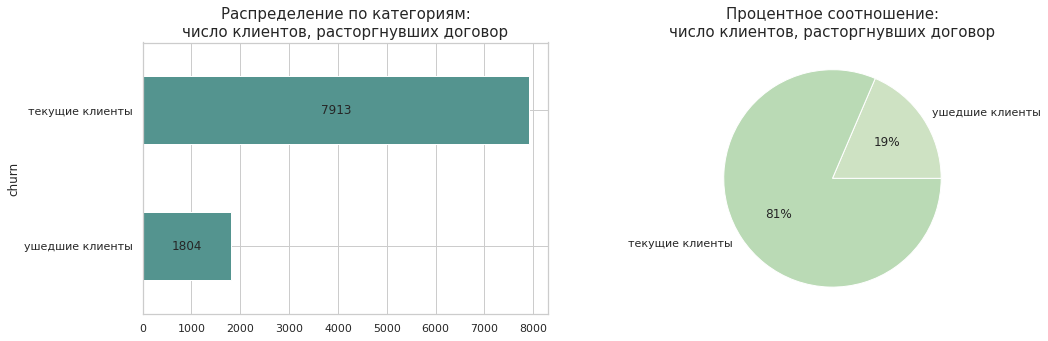

In [63]:
#выведем общую информацию о клиентах, которые расторгнули договор 

plot_pie('churn', 
         'число клиентов, расторгнувших договор', 
         rename=True,
         rename_dict={0: 'текущие клиенты', 
                      1: 'ушедшие клиенты'})

Из более 9 тысяч человек, содержащихся в базе, 19% или 1800 человек перестали считаться клиентами банка.

In [64]:
#вынесем данные об ушедших и оставшихся клиентах в отдельные переменные

churn = df.query('churn == 1')
stay = df.query('churn == 0')

<a id="comparison_gender"> </a>
<a name="comparison_gender"> </a>
#### Характеристика пола клиентов, в т.ч. расторгнувших договор

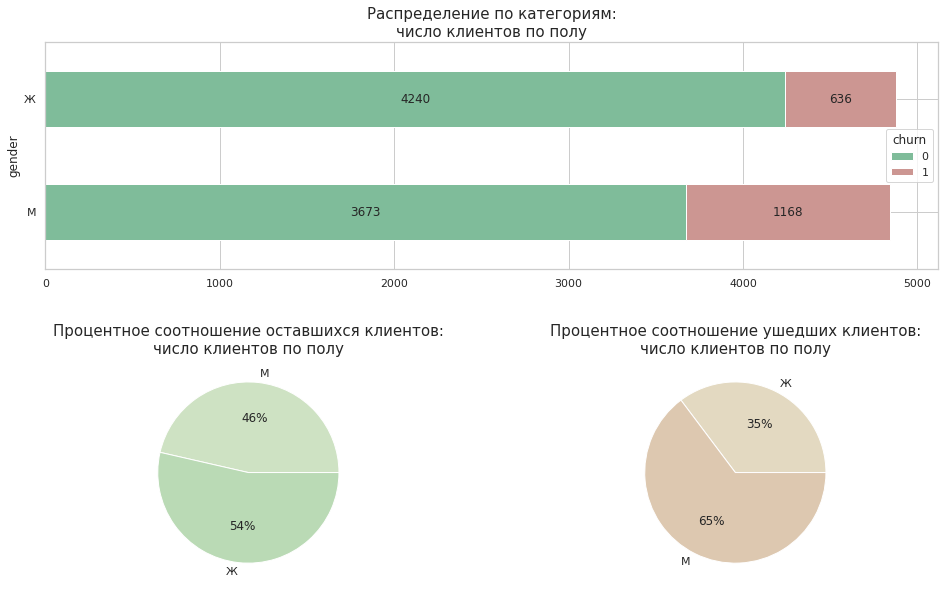

In [65]:
#построим графики по столбцу с полом клиента 

plot_two_pies('gender', 'число клиентов по полу')

Процентное соотношение женщин и мужчин, являющихся клиентами банка, одинаковое, незначительный перевес имеет женский пол. Ситуация с оставшимися и ушедшими клиентами имеет обратную тенденцию: если среди текущих клиентов несколько больше женщин, то почти 2/3 ушедших пользователей составляют мужчины. Женщины реже предпочитают расторгать договор. 

<a id="comparison_city"> </a>
<a name="comparison_city"> </a>
#### Характеристика городов проживания клиентов, в т.ч. расторгнувших договор

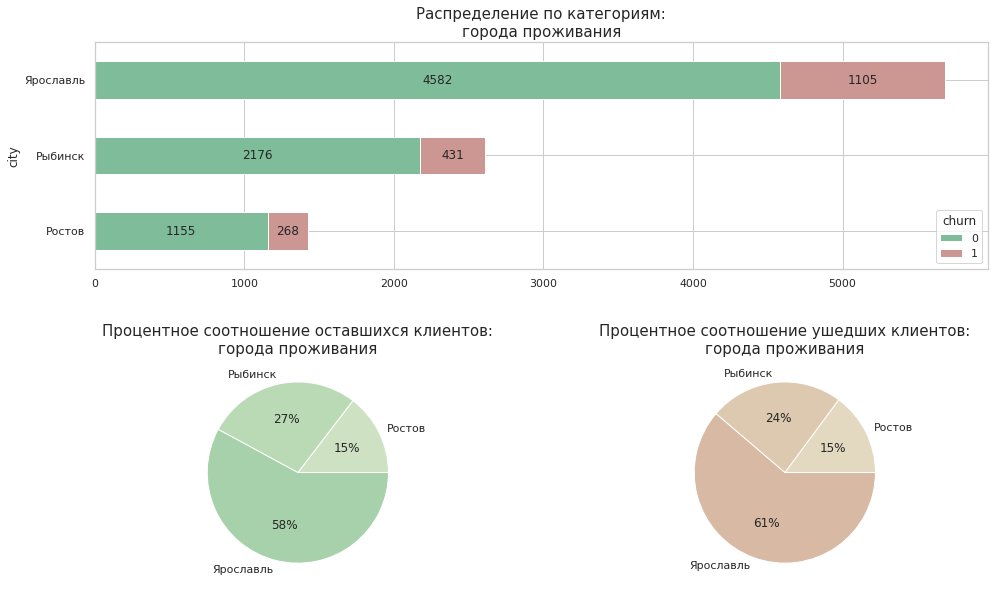

In [66]:
#построим графики по столбцу с городом клиента 

plot_two_pies('city', 'города проживания')

Подавляющее большинство клиентов банка - более 5,5 тыс. - живут в региональном центре - Ярославле. Далее идет Рыбинск и замыкает список Ростов, на который приходится около 1,5 тысяч пользователей банковских услуг. Данные по городам проживания оставшихся и ушедших клиентов не слишком отличаются от общих по своим пропорциям. Чаще всего расторгают договор жители Ярославля, на который приходится большинство пользователей, далее идет второй по клиентской численности офис в Рыбинске, где процент оставшихся пользователей выше, чем ушедших.

<a id="comparison_age"> </a>
<a name="comparison_age"> </a>
#### Характеристика возрастных групп клиентов, в т.ч. расторгнувших договор

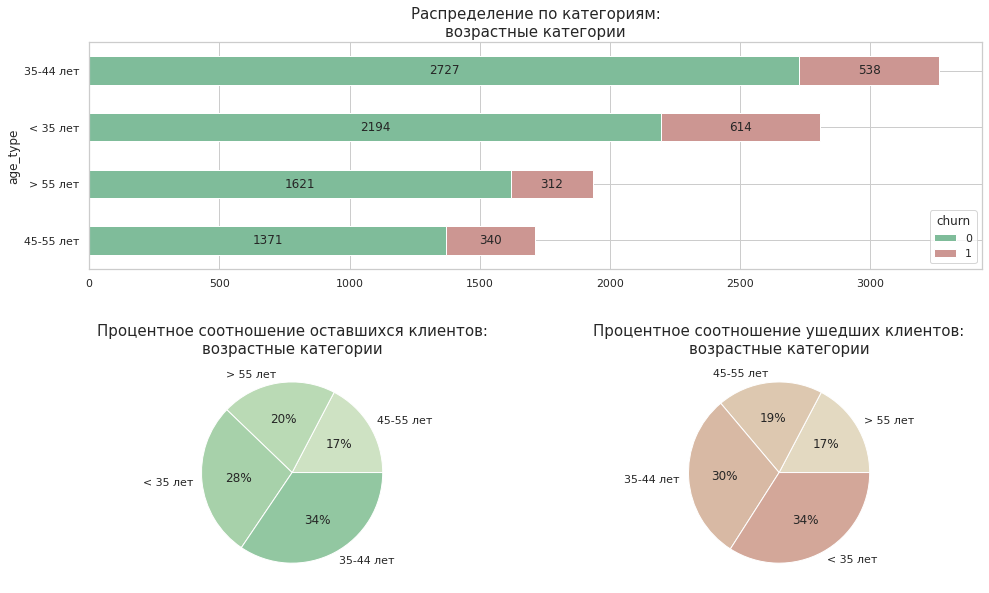

In [67]:
#построим графики по столбцу с возрастной категорией клиента 

plot_two_pies('age_type', 
              'возрастные категории',
              rename=True,
              rename_dict=age_dict)

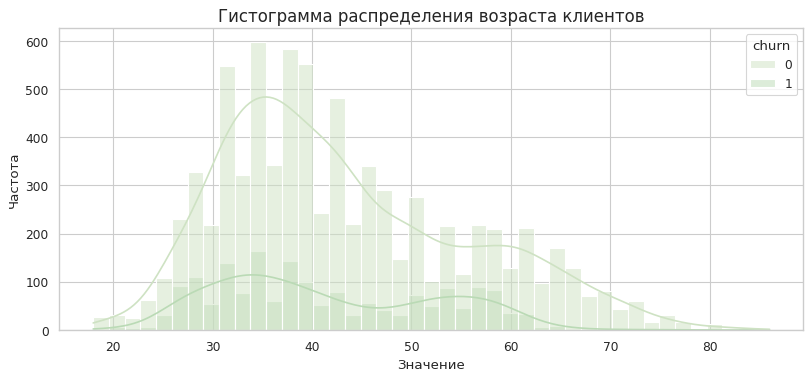

In [68]:
#построим гистограмму по возрасту клиентов 

two_hist('age', 'Гистограмма распределения возраста клиентов')

Большинство клиентов банка - это молодое поколение и клиенты активного трудового возраста, чаще всего до 45 лет.  
Возрастное распределение лояльных клиентов и ушедших из банка, достаточно схоже, однако молодежь до 35 лет несколько чаще оказывается в списках клиентов, покинувших банк (34%).

<a id="comparison_salary"> </a>
<a name="comparison_salary"> </a>
#### Характеристика дохода клиентов, в т.ч. расторгнувших договор

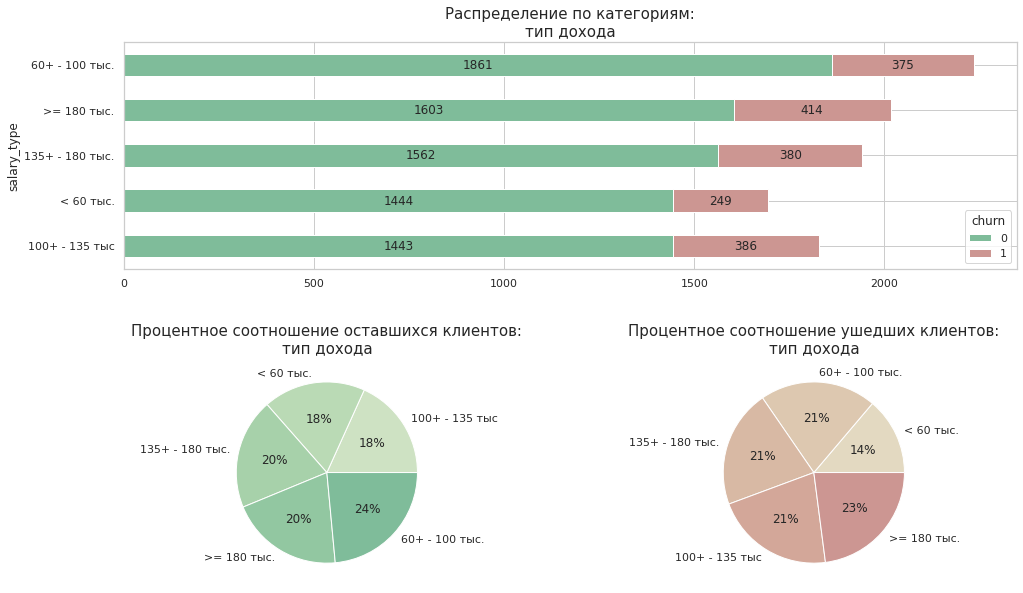

In [69]:
#построим графики по столбцу с категорией дохода клиента 

plot_two_pies('salary_type', 
              'тип дохода',
              rename=True,
              rename_dict=salary_dict)

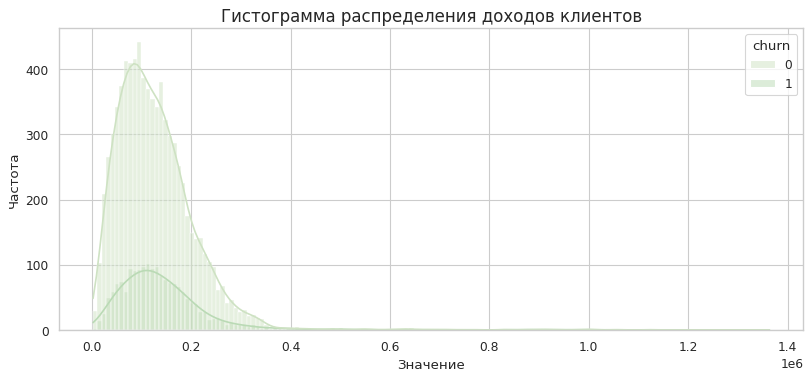

In [70]:
#построим гистограмму по доходу клиентов 

two_hist('est_salary', 'Гистограмма распределения доходов клиентов')

In [71]:
#выведем медианное и среднее значение дохода клиентов

display('среднее значение дохода лояльных клиентов: {:.2f}'.format(stay["est_salary"].mean()))
display('медианное дохода лояльных клиентов: {:.2f}'.format(stay["est_salary"].median()))

display('среднее значение дохода ушедших клиентов: {:.2f}'.format(churn["est_salary"].mean()))
display('медианное значение дохода ушедших клиентов: {:.2f}'.format(churn["est_salary"].median()))

'среднее значение дохода лояльных клиентов: 129251.83'

'медианное дохода лояльных клиентов: 115548.62'

'среднее значение дохода ушедших клиентов: 142760.06'

'медианное значение дохода ушедших клиентов: 124757.59'

Размеры категорий дохода получились достаточно приблизительными по итогам разбивки по группам. Наибольшая группа клиентов датафрейма приходится на категорию клиентов с доходом от 60 до 100 тысяч - на нее, согласно гистограмме и круговой диаграмме, попадают пиковые значения оставшихся клиентов. Следующие три категории (с шагом в 30-35 тысяч) включают примерно одинаковое число клиентов. Медианное значение дохода для клиентов банка составляет 116 тысяч рублей, среднее - на 13 тысяч больше.

Процентное соотношение доходов ушедших клиентов по-прежнему близкое. Однако, данные показывают, что несколько чаще уходят более состоятельные клиенты: это подтверждает как увеличившееся медианное значение с 116 до 125 тысяч и среднее - с 129 до 143 тысяч, так и преобладание долей групп с более высоким доходом (в частности, на клиентов с доходом от 180 тысяч отводится 23%). 

<a id="comparison_equity"> </a>
<a name="comparison_equity"> </a>
#### Характеристика объектов собственности клиентов, в т.ч. расторгнувших договор

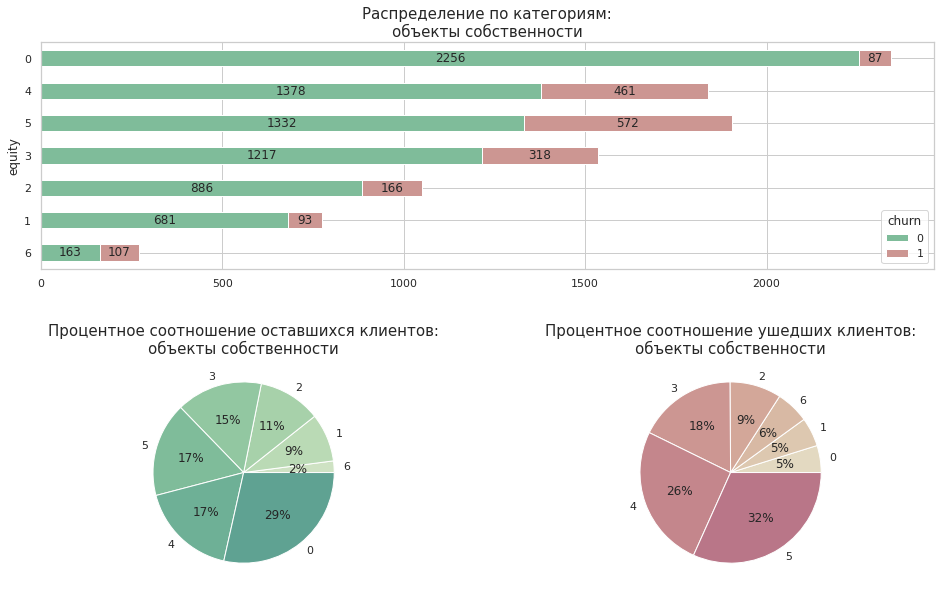

In [72]:
#построим графики по столбцу с объектами клиента 

plot_two_pies('equity', 'объекты собственности')

Несмотря на то, что большая часть клиентов банка имеет достаточно высокий доход по меркам области, большинство пользователей не владеет никакими объектами собственности. Напротив, вторая и третья по численности группы имеют сразу пять или четыре объекта. Наиболее популярные, как могло бы показаться на первый взгляд, категории с одним или двумя объектами, находятся лишь в конце списка. Пропорциональное распределение категорий по объектом для лояльных клиентов в большей степени совпадает с общей картиной. 

Несмотря на лидерство по общим характеристикам, категория клиентов с отсутствием собственности представлена достаточно незначительно в группе лиц, расторгших договор - на нее отведено всего 5% данных. Самая большая доля (32%) отводится клиентам, имеющим 5 объектов в собственности. Далее идут пользователи банковских услуг с 4 и 3 объектами. 

<a id="comparison_products"> </a>
<a name="comparison_products"> </a>
#### Характеристика использования продуктов клиентами, в т.ч. расторгнувшими договор

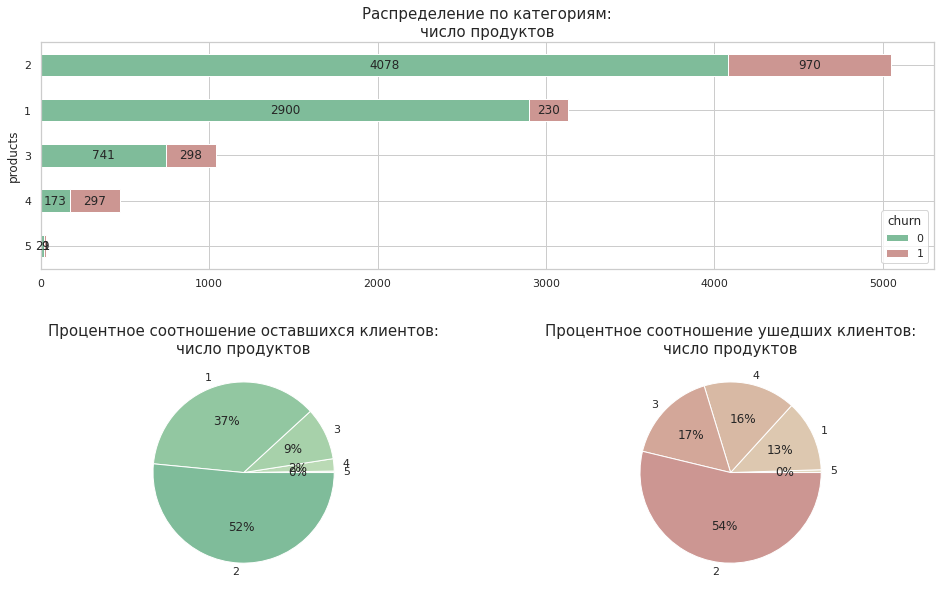

In [73]:
#построим графики по столбцу с продуктами клиента 

plot_two_pies('products', 'число продуктов')

Более половины клиентов, в том числе оставшихся (52%) используют два продукта, входящих в число банковских услуг. Пользователи одного продукта составляют 3,1 тысячи человек или треть клиентской базы. Использование более трех продуктов встречается гораздо реже. У ушедших клиентов по-прежнему наибольшая доля у владельцев двух продуктов. Главное отличие ушедших клиентов от лояльных: выше соотношение тех, кто пользуется 3 и 4 продуктами и меньше - одним.

<a id="comparison_cards"> </a>
<a name="comparison_cards"> </a>
#### Характеристика использования кредитных карт клиентами, в т.ч. расторгнувшими договор

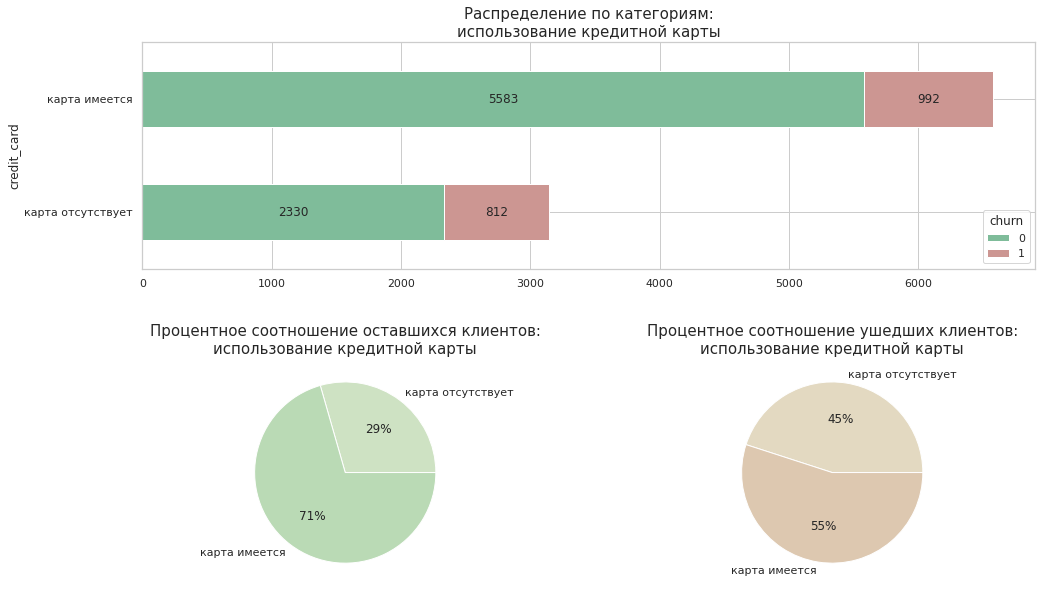

In [74]:
#построим графики по столбцу с информацией о кредитных картах клиента 

plot_two_pies('credit_card', 
              'использование кредитной карты', 
              rename=True,
              rename_dict={0: 'карта отсутствует', 
                           1: 'карта имеется'})

У 6,6 тысяч клиентов имеется кредитная карта банка, что составляет 71% тех, кто остается клиентом банка и 55% ушедших клиентов. Однако процент ушедших клиентов, у которых карта отсутствовала, пропорционально выше, чем в у оставшихся клиентов (45 против 29%).

<a id="comparison_score"> </a>
<a name="comparison_score"> </a>
#### Характеристика кредитного рейтинга клиентов, в т.ч. расторгнувших договор

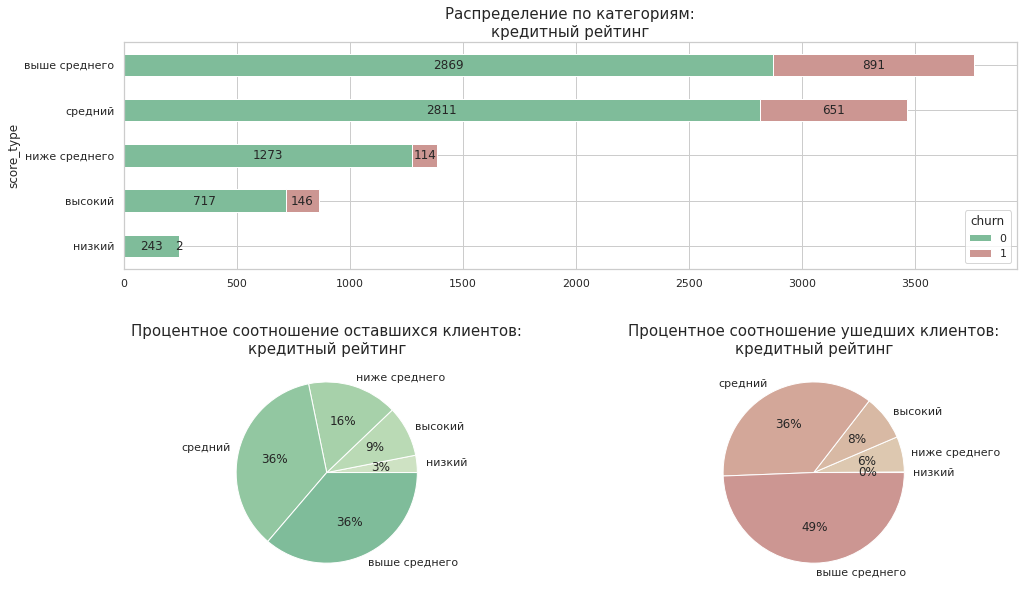

In [75]:
#построим графики по столбцу с информацией о кредитном рейтинге клиентов

plot_two_pies('score_type', 
              'кредитный рейтинг', 
              rename=True,
              rename_dict=score_dict)

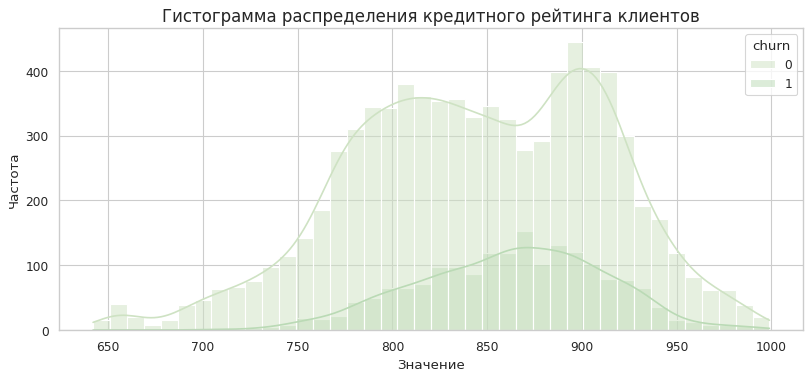

In [76]:
#построим гистограмму по кредитному скорингу

two_hist('score', 'Гистограмма распределения кредитного рейтинга клиентов')

Согласно полученным значениям, большинство клиентов имеет неплохую кредитную историю. Большинство оставшихся и ушедших клиентов входят в категорию с кредитным рейтингом выше среднего или средний (по 36%). Наилучшим рейтингом отмечено чуть менее 900 человек или 8-9% клиентов, которые ушли/остались с банком. В то же время, почти половина клиентов, которые уходят из банка, имеют рейтинг выше среднего, в основном - от 850 до 900 баллов. В наименьшей степени склонны к расторжению договора клиенты с низкими значения рейтинга. 

<a id="comparison_balance"> </a>
<a name="comparison_balance"> </a>
#### Характеристика баланса клиентов, в т.ч. расторгнувших договор

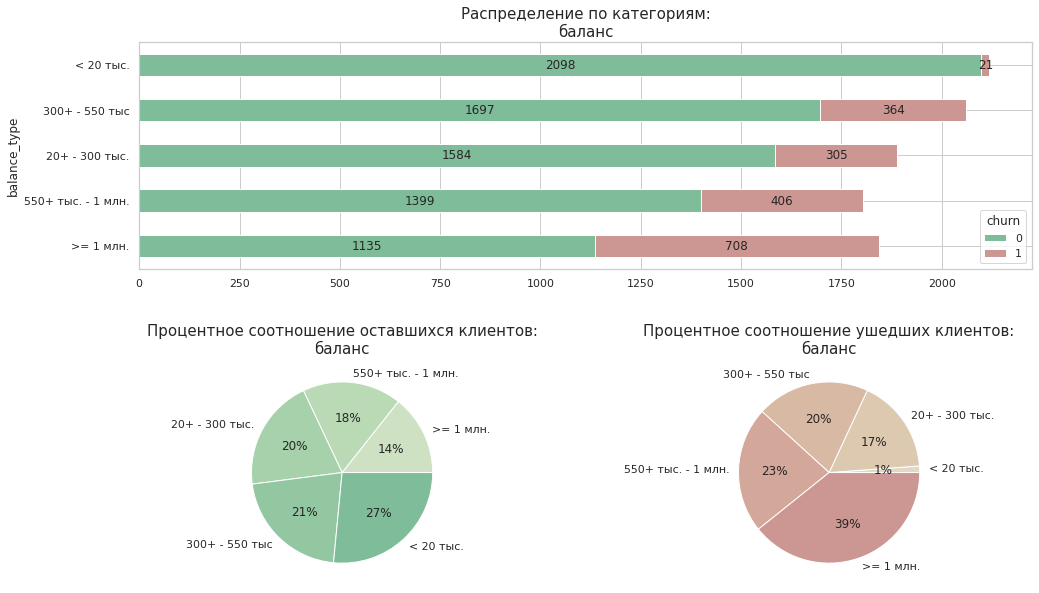

In [77]:
#построим графики по столбцу с информацией о балансе клиентов

plot_two_pies('balance_type', 
              'баланс', 
              rename=True,
              rename_dict=balance_dict)

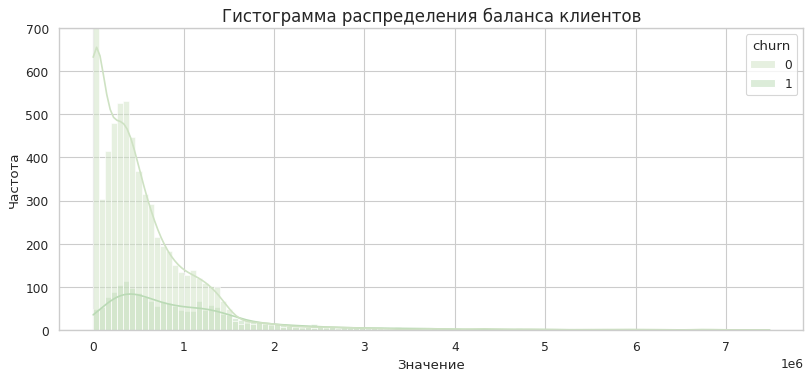

In [78]:
#построим гистограмму по балансу клиентов

two_hist('balance', 'Гистограмма распределения баланса клиентов')
plt.ylim(0,700);

In [79]:
#выведем медианное и среднее значение баланса клиентов

display('среднее значение оставшихся клиентов: {:.2f}'.format(stay["balance"].mean()))
display('медианное оставшихся клиентов: {:.2f}'.format(stay["balance"].median()))

display('среднее значение ушедших клиентов: {:.2f}'.format(churn["balance"].mean()))
display('медианное ушедших клиентов: {:.2f}'.format(churn["balance"].median()))

'среднее значение оставшихся клиентов: 495022.94'

'медианное оставшихся клиентов: 334194.24'

'среднее значение ушедших клиентов: 1009094.21'

'медианное ушедших клиентов: 771642.31'

Распределение клиентов по категориям баланса имеет достаточное высокие значения долей с преобладанием клиентов с балансом до 20 тысяч ввиду достаточного числа пропущенных значений. Среди лояльных пользователей 27% данных приходится на клиентов с балансом до 20 тысяч, в то время как самая низка доля, 14%, - с балансом от миллиона и выше. В отличие оставшихся клиентов с близкими соотношениями баланса, среди пользователей, растрогнувших договор, достаточно четко выделяется тенденция к уходу из банка клиентов с высокими значениями баланса. Почти 40% клиентов, которые расторгли договор, имели баланс от 1 млн рублей и выше, на втором месте - клиенты с балансом от 550 тысяч. И хотя пиковые значения как лояльных, так и ушедших клиентов совпадают, медианные и средние значения значительно отличаются. Можно предположить, что практически все ушедшие клиенты пользователись банковским счетом.

<a id="comparison_activity"> </a>
<a name="comparison_activity"> </a>
#### Характеристика активности клиентов, в т.ч. расторгнувших договор

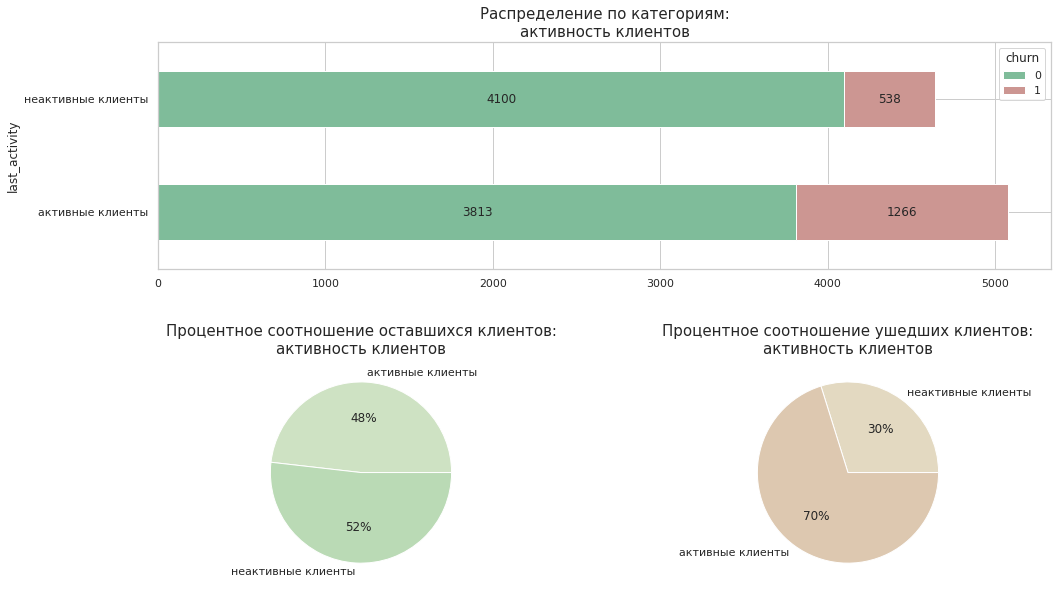

In [80]:
#построим графики по столбцу с информацией об активности клиентов

plot_two_pies('last_activity', 
              'активность клиентов', 
              rename=True,
              rename_dict={0: 'неактивные клиенты', 
                           1: 'активные клиенты'})

Соотношение активных клиентов и тех, кто давно не пользовался услугами банка, близко к паритету: 4600 против 5000 человек в пользу активных клиентов. Процентное соотношение ушедших активных клиентов гораздо выше - 70% по сравнению с 52% в целом по банку. С одной стороны, это может говорить как о том, что клиенты проявляют активность перед расторжением договора (например, выводят деньги со счета, закрывают продукты и т.д.), так и том, что клиенты перестают довольствоваться услугами банка в процессе пользования.

<a id="second_conclusion"> </a>
<a name="second_conclusion"> </a>
### Вывод по этапу

Таким образом, на основании полученных данных можно сделать следующий вывод о **характеристике большинства клиентов банка**:
- мужчины и женщины составляют равное количество клиентов;
- большая часть клиентов проживает в Ярославле, в на региональные офисы приходится около 40% клиентов;
- основную часть клиентов составляют лица активного трудового возраста (до 45 лет), в меньшей степени - те, кто еще не подошел или уже несколько лет как пересек нижнюю возрастную границу;
- клиенты банка имеют хороший доход, значительно превышающий средние значения по региону;
- большинство клиентов по оценкам банка не имеют объектов, либо в их собственности сразу 4-5 объекта;
- более половины клиентов пользуются двумя продуктами банка, несколько реже - одним продуктом;
- у двух трети клиентов имеется кредитная карта;
- подавляющее большинство клиентов имеет кредитный рейтинг выше среднего (около 3,8 тысячи человек) или средний (около 3,5 тысячи человек);
- в датафрейме имеется небольшое преобладание клиентов с низким балансом (до 20 тысяч) ввиду высокого числа пропущенных значений, остальные категории достаточно близко распределены между собой;
- активных клиентов банка несколько больше: 4500 против 5000.

**Клиентов, расторгнувших договор с банком (19% от датафрейма), отличают следующие черты**:
- почти в два раза чаще расторгают договор мужчины, нежели женщины, в то время как женщины больше проявляют лояльность к банку и преобладают в числе оставшихся (54%);
- доля ушедших клиентов из определенных городов соответствует общему соотношению числа клиентов в тех или иных городах;
- наиболее подвержены уходу клиенты до 45 лет, в особенности - до 35 лет, в то время как наибольшее число лояльных клиентов приходится на возраст 35-44 лет;
- ушедшие клиенты имеют достаточно высокий доход: медианное значение равно 125 тысячи рублей, подавляющее большинство клиентов имело доход от 100 тысяч и выше;
- чаще всего уходят из банка клиенты с 5 объектами, несколько реже - с 3 и 4 объектами, в то время как у лояльных клиентов довольно часто отсутствуют объекты;
- более половины ушедших клиентов пользовалось 2 продуктами, однако достаточный процент отводится на пользователей 3 и 4 продуктов — лояльные клиенты чаще предпочитают 2 продукта или один;
- 45% ушедших клиентов не имело кредитной карты, что на 16% выше, чем у лояльных клиентов;
- почти половина клиентов, расторгнувших договор, имела кредитный скоринг выше среднего,  что выше, чем у лояльной группы, вторая по величине доля (36%) - имела средний рейтинг, что совпадает с лояльными клиентами;
- почти 2/3 ушедших клиентов имела баланс от 550 тысяч и выше, из которых почти 40% - от 1 миллиона, менее 20 тысяч находилось на счетах всего у 1 процента таких клиентов, что говорит о том, что почти все они пользовались услугой банковского счета;
- 70% клиентов проявляли активность перед уходом, что на 18% выше картины по оставшимся клиентам.

<a id="portray"> </a>
<a name="portray"> </a>
## Составление портретов клиентов, расторгнувших договор

В данном подразделе мы выявим особые черты ушедших клиентов путем построения матрицы корреляции с данными по оттоку, а также корреляции различных характеристик, типичных для пользователей, которые расторгают договор.

<a id="portray_churn_correlation"> </a>
<a name="portray_churn_correlation"> </a>
### Выявление корреляции характеристик клиента и факта расторжения договора

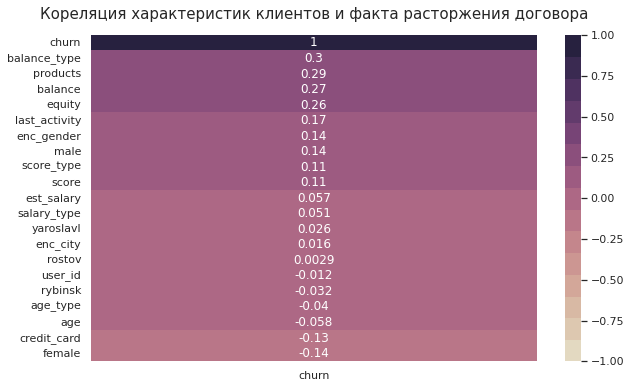

In [81]:
#отобразим корреляцию всех столбцов со столбцом churn

plt.figure(figsize=(10, 6))
                
heatmap = (
    sns
    .heatmap(df.corr()[['churn']]
             .sort_values(by='churn', ascending=False), 
             vmin=-1, 
             vmax=1, 
             annot=True, 
             cmap=palette_2)
)

heatmap.set_title('Кореляция характеристик клиентов и факта расторжения договора', 
                  fontdict={'fontsize': 15}, 
                  pad=16);

Ни одна из характеристик не имеет значительной корреляции с показателем оттока клиентов. К показателям, которые по шкале Чеддока можно отнести к верхней границе слабой корреляции, можно отнести такие данные, как тип баланса (баланс), количество продуктов и объектов собственности (0.3-0.26 соответственно). Самая высокая отрицательная корреляция - у клиентов женского пола и владельцев кредитных карт.

<a id="portray_correlation"> </a>
<a name="portray_correlation"> </a>
### Построение матрицы корреляций характеристик клиентов, расторгнувших договор

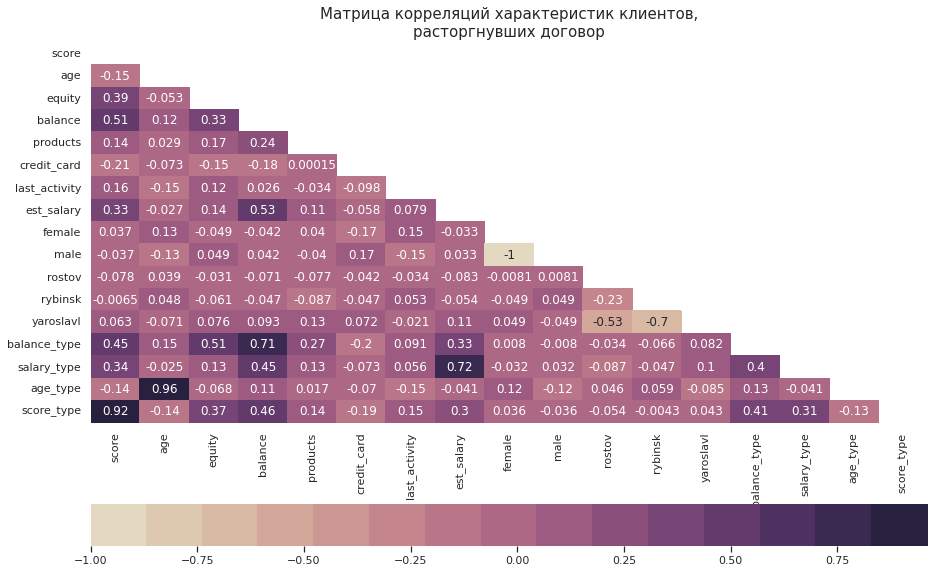

In [82]:
#удалим ряд столбцов, которые не несут информации, как user_id, или дублируются иными столбцами

churn_digits = df.query('churn == 1').drop(columns = ['user_id', 
                                                      'churn', 
                                                      'city', 
                                                      'gender',
                                                      'enc_city',
                                                      'enc_gender'], axis = 1)

#построим матрицу корреляция в формате пирамиды
matrix = np.triu(churn_digits.corr())

plt.figure(figsize=(15, 10))
sns.heatmap(churn_digits.corr(), 
            annot=True, cmap=palette_2,  
            fmt='.2g', 
            cbar_kws= {'orientation': 'horizontal'}, 
            mask=matrix) 
plt.title('Матрица корреляций характеристик клиентов,\nрасторгнувших договор', 
          fontsize = 15);

Самые высокие значения корелляции характеристик клиентов, расторгнувших договор, имеют столбцы, созданные для группировки данных - как `age` и `age_type`, `score` и `score_type` и т.д. За исключением данных столбов наибольшая степень корреляции имеет отметку около 0.5, что по шкале Чеддока является границей между слабой и умеренной корреляцией.
Таким образом, согласно полученным значениям, имеется относительно умеренная корреляция между такими столбцами, как:
- баланс и кредитный рейтинг (0.51);
- доход и баланс (0.53);
- тип баланса и объекты в собственности (0.51)

Также стоит отметить наличие небольшой корреляции между такими характеристиками, как:
- объекты в собственности и кредитный рейтинг (0.39);
- доход и кредитный рейтинг (0.33-0.34).

Все остальные столбцы имеют корреляцию ниже 0.3 или схожи по своим данным (например, баланс/доход и тип баланса/тип дохода).

<a id="portray_correlation_plots"> </a>
<a name="portray_correlation_plots"> </a>
### Построение графиков для столбцов с выявленной корреляцией

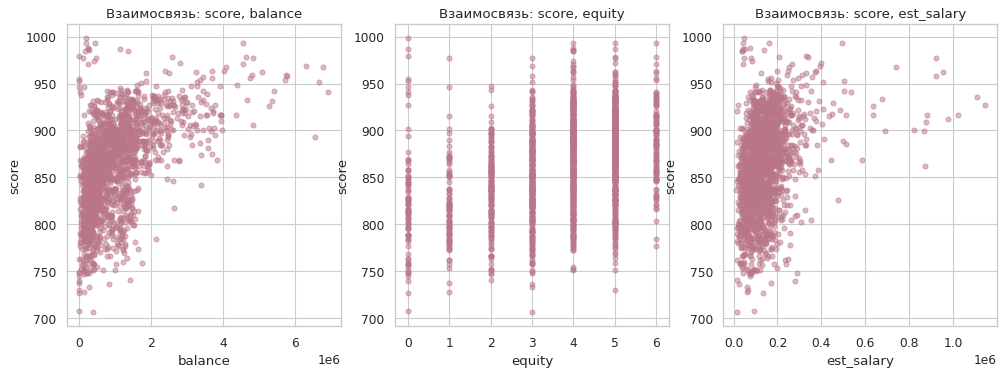

In [83]:
#построим диаграмму разброса по кредитному рейтингу

fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=80)

for i, ax in zip(['balance', 'equity', 'est_salary'], axes.flat):
     (churn.plot(x=i, 
                 y='score', 
                 kind='scatter', 
                 alpha=0.5, 
                 grid=True, 
                 color=palette_2[6:7], 
                 ax=ax) )
     ax.set_title(f'Взаимосвязь: score, {i}');

Наиболее заметное увеличение в балансе характерно для бывших клиентов с кредитным рейтингом от 900 баллов. Увеличение числа объектов и рост кредитного рейтинга в целом прослеживаются на диаграмме, однако ситуация для 3-5 объектов не имеет значительных различий. Постепенный рост дохода начинается после 850 баллов скоринга.

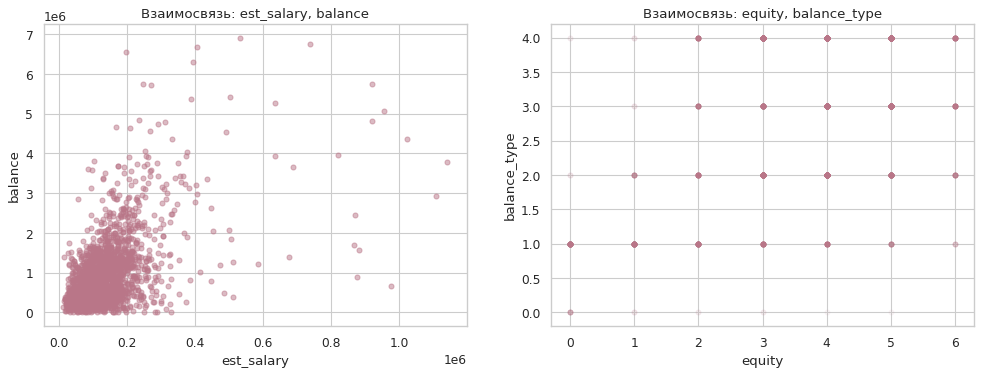

In [84]:
#построим диаграмму разброса для двух оставшихся корреляций

plt.figure(figsize=(15, 5), dpi=80)

ax1 = plt.subplot(1, 2, 1)
churn.plot(x='est_salary', 
           y='balance', 
           kind='scatter', 
           alpha=0.5, 
           grid=True, 
           color=palette_2[6:7], 
           ax=ax1)
ax1.set_title(f'Взаимосвязь: est_salary, balance')


ax2 = plt.subplot(1, 2, 2)
churn.plot(x='equity', 
           y='balance_type', 
           kind='scatter', 
           alpha=0.05, 
           grid=True, 
           color=palette_2[6:7], 
           ax=ax2)
ax2.set_title(f'Взаимосвязь: equity, balance_type');

Распределение дохода и баланса преимущественно сосредоточено в пределах до 2 млн баланса и до 250 тысяч дохода. Достаточно заметно прослеживается взаимосвязь между низким балансом и отсутствием собственности, а также наличием низкого баланса у владельцев 1-2 объектов.

<a id="portray_functions"> </a>
<a name="portray_functions"> </a>

### Создание функций для сравнения характеристик и анализа соотношения долей в значениях (с различием в пропорциях не более 5%), построения круговых диаграмм, перебора характеристик

В данном подразделе мы более детально рассмотрим клиентов, комбинируя отдельные характеристики.

Через матрицу корреляции мы уже нашли ряд признаков, которые характерны для ушедших клиентов. Далее нам предстоит попарно сравнить оставшиеся показатели, чтобы найти те или иные взаимосвязи. 

Принимая во внимание, что в чистом виде у нас около 10 типов данных, объединенных почти в 15 столбцов, попарное комбинирование займет огромное количество итераций. Следовательно, нам необходимо заранее определить, какие характеристики мы будем использовать и почему. 

В первую очередь, сравнивая определенные группы между собой (например, мужчин и женщин), нас будет интересовать не столь численная разница, сколько разница в пропорциях, например, информация о том, что ушедших клиентов-женщин из Ростова было 50, а мужчин - 100, даст нам меньше понимания, чем тот факт, что таких женщин и таких мужчин было по 5% в своих категориях, т.е. мы можем сделать вывод, что особой разницы между ними нет. 

В датафрейме имеется четыре столбца - `gender`, `credit_card`, `last_activity`, `city`, в которых содержится только два или три вида информации (мужчины/женщины, да/нет). Следовательно, данные в этих столбцах могут быть максимально просто сравнены между собой (например, через функцию с циклом). 

Если пропорциональные различия в данных по каждым двум категориям достаточно велики (установим различие в 5%), то мы рассмотрим их более подробно. Если пропорциональных различий немного, значит, данные в целом вписываются в общую статистику (например, мы знаем, условно, что если в Ярославе проживает 60% женщин и 62% мужчин, то всего в Ярославле будет проживать около 61% клиентов в целом, а эта информация нам уже известна благодаря предыдущему этапу).

Для сравнительного анализа создадим функции, которые позволят сократить количество кода и упросить получение данных.

In [85]:
#создадим функцию для сравнения столбцов

def comparison(column, category):
    """Функция содержит код для построения сводной таблицы
    для сравнения показателей из двух столбцов.

    Передаваемые на вход аргументы:
    column - столбец, данные которого мы сравниваем
    category - столбец, по которому группируем данные
    """
    temp = churn.pivot_table(index=category, 
                             columns=column, 
                             values='user_id', 
                             aggfunc='count')
    temp = (temp.div(temp.sum(axis=0), axis=1) * 100).round()
    temp['diff'] = temp.iloc[:,0] - temp.iloc[:,1]

    #если столбец содержит закордированные данные,
    #заменим их значениями из словаря
    dictionaries = {
    'balance_type': balance_dict,
    'salary_type': salary_dict,
    'age_type': age_dict,
    'score_type': score_dict,
    'enc_gender': {0: 'женщины', 1: 'мужчины'}}

    if category in ['balance_type', 
                    'salary_type', 
                    'age_type', 
                    'score_type', 
                    'enc_gender']:
      temp = temp.rename(index=dictionaries[category])

    return temp

In [86]:
#создадим функцию для сравнения круговых диаграмм

def pies(column, category):
    """Функция содержит код для построения круговых диаграмм
    для сравнения показателей.

    Передаваемые на вход аргументы:
    column - столбец, данные которого мы строим диаграммы
    category - столбец, по которому сравниваем данные
    """
    
    temp = churn.pivot_table(index=category, 
                     columns=column, 
                     values='user_id', 
                     aggfunc='count')

    dictionaries = {
        'balance_type': balance_dict,
        'salary_type': salary_dict,
        'age_type': age_dict,
        'score_type': score_dict,
        'enc_gender': {0: 'женщины', 1: 'мужчины'}}

    if category in ['balance_type', 
                    'salary_type', 
                    'age_type', 'score_type', 'enc_gender']:
        temp = temp.rename(index=dictionaries[category])

    rows = len(temp.columns)
    if rows == 2 or rows == 3:
        fig, axes = plt.subplots(1, rows, figsize=(15, 8), dpi=80)
    else:
        fig, axes = plt.subplots(2, int(mth.ceil(rows / 2)), 
                                 figsize=(15, 8), 
                                 dpi=80)
            
    for value, ax in zip(temp.columns, axes.flat):
        temp.plot(kind='pie', 
                  ax=ax, 
                  y=value, 
                  autopct='%.0f%%', 
                  legend=False, 
                  colors=palette_2)
        ax.set_title(f'Данные по столбцу {column}:\nзначение {value}, сравнение: {category}')
        ax.set_ylabel('')

In [87]:
#создадим функцию для прохода по столбцам 

def pie_loop(column):
    """Функция содержит код для цикличного прохождения по столбцам
    для сравнения показателей той или иной характеристики.

    Передаваемые на вход аргументы:
    column - столбец, данные по которому мы хотим получить
    """

    #сравнение будет осуществляться по следующим категориям
    categories = ['enc_gender', 
                  'city', 
                  'equity', 
                  'products', 
                  'credit_card', 
                  'last_activity', 
                  'balance_type', 
                  'salary_type', 
                  'age_type', 
                  'score_type']

    #берем две разные характеристики и строим по ним сводную таблицу
    for category in categories:
        if category != column:
            table = comparison(column, category)

    #если хотя бы один показатель таблицы отличается в разных столбцах на 5%,
    #выводим по этой таблице круговую диаграмму
            if len(table.query('abs(diff) > 5')) > 0:
                display(f'Сравнение: {category}')
                display(table)
                pies(column, category)
                plt.show()

<a id="portray_gender"> </a>
<a name="portray_gender"> </a>
### Сравнение характеристик ушедших клиентов по полу

'Сравнение: credit_card'

gender,Ж,М,diff
credit_card,,,
0,56.0,39.0,17.0
1,44.0,61.0,-17.0


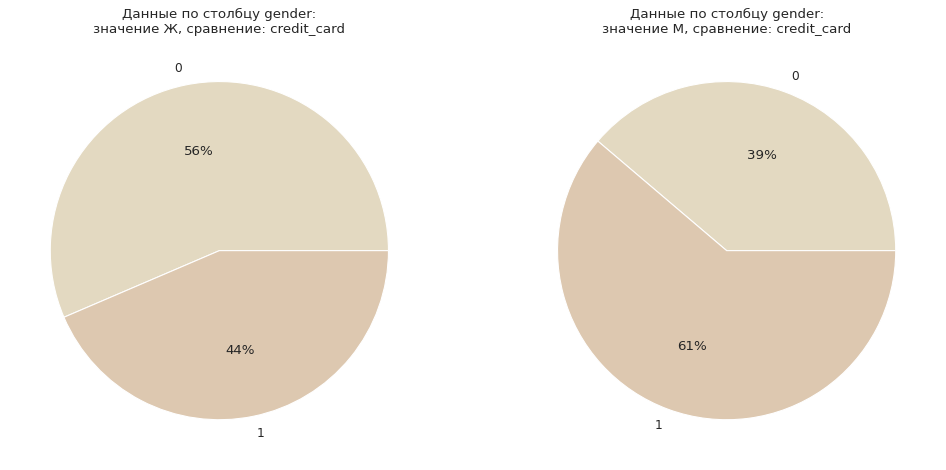

'Сравнение: last_activity'

gender,Ж,М,diff
last_activity,,,
0,20.0,35.0,-15.0
1,80.0,65.0,15.0


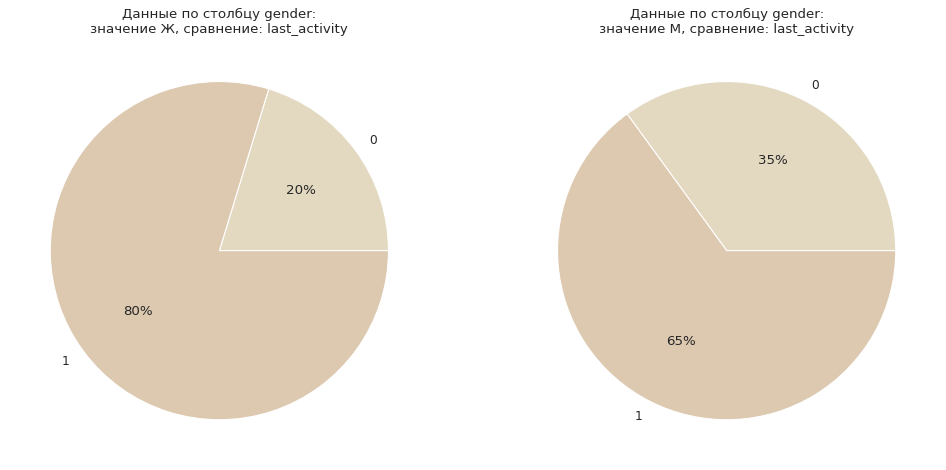

'Сравнение: salary_type'

gender,Ж,М,diff
salary_type,,,
< 60 тыс.,14.0,13.0,1.0
60+ - 100 тыс.,20.0,21.0,-1.0
100+ - 135 тыс,22.0,21.0,1.0
135+ - 180 тыс.,24.0,20.0,4.0
>= 180 тыс.,19.0,25.0,-6.0


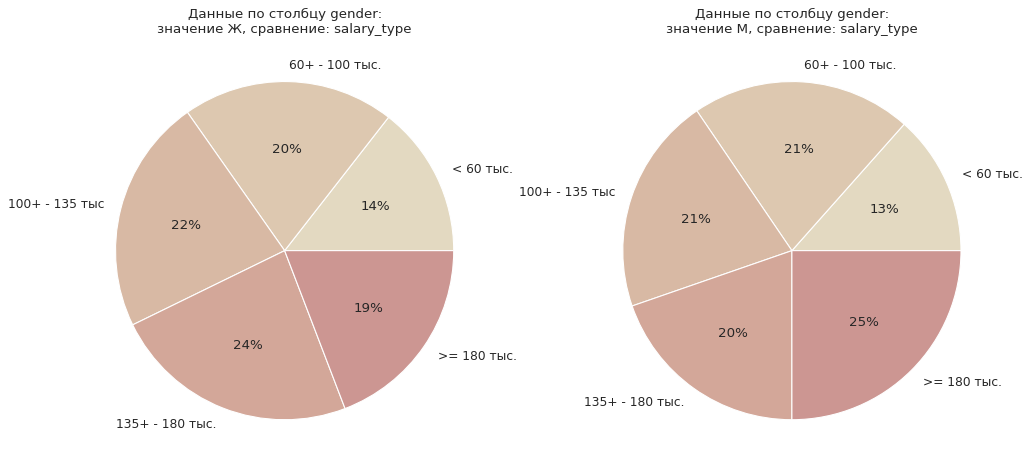

'Сравнение: age_type'

gender,Ж,М,diff
age_type,,,
< 35 лет,31.0,36.0,-5.0
35-44 лет,25.0,32.0,-7.0
45-55 лет,20.0,18.0,2.0
> 55 лет,24.0,14.0,10.0


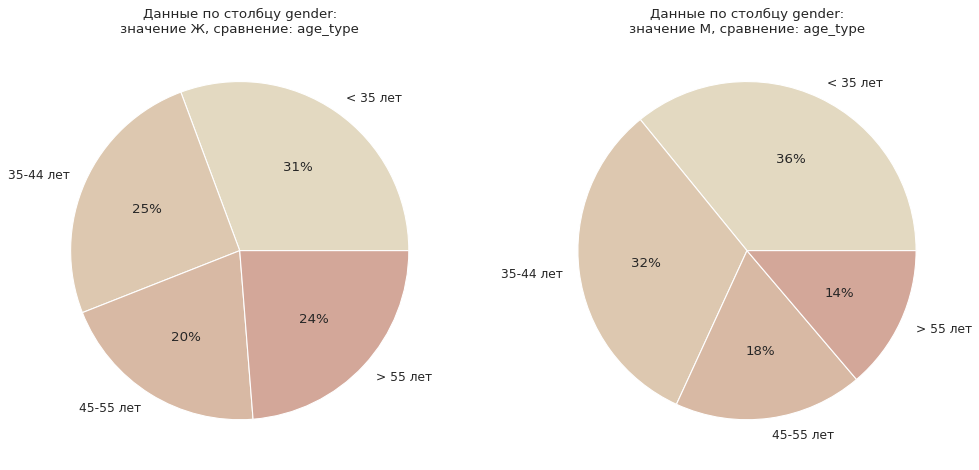

In [88]:
#сравним значения по полу, применив созданные функции

pie_loop('gender')

По итогам сравнения мы получили четыре группы характеристик, которые имеют различия для ушедших клиентов-мужчин и клиентов-женщин.

Здесь и далее, учитывая объем данных, мы будем обозначать приоритет (высокий, средний, низкий) для каждой группы, исходя из значимости различий и самого показателя.

1) Кредитная карта. Ушедшие женщины в большинстве предпочитали не использовать кредитные карты (56% женщин не имели кредитной карты), у мужчин этот показатель равен 39%.
<br>Приоритет: высокий, различие значительно


2) Активность. 80% женщин проявляли активность перед расторжением счета по сравнению с 65% мужчин.
<br>Приоритет: средний, различие значительно, но критерий размытый

3) Доход. Мужчины, расторгнувшие договор, несколько чаще имеют очень высокий доход - от 180 тысяч (25%), остальные группы (кроме самого низкого дохода) примерно равны в своих пропорциях. У женщин наиболее распространенной группой дохода является группа дохода выше среднего, 135-180 тысяч (24%), далее идут группы со средним доходом и ниже среднего и только на четвертом месте - группа с доходом от 180 тысяч (19%).
<br>Приоритет: высокий, различие значительно, но в целом пропорции достаточно близки - необходимо проверить этот критерий дополнительно.

4) Возраст. Свыше 30% и мужчин, и женщин, расторгнувших договор, относятся к группе молодежи (до 35 лет), однако, у мужчин более выражена склонность к уходу из банка с 18 до 45 лет, в то время как у женщин после 35 лет это различие не столь высоко. 
<br>Приоритет: высокий, различие значительно, но, учитывая преобладание двух категорий в обеих группах, стоит проверить критерий дополнительно.

<a id="portray_city"> </a>
<a name="portray_city"> </a>
### Сравнение характеристик ушедших клиентов по городу

'Сравнение: products'

city,Ростов,Рыбинск,Ярославль,diff
products,,,,
1,18.0,13.0,11.0,5.0
2,57.0,65.0,49.0,-8.0
3,10.0,7.0,22.0,3.0
4,14.0,14.0,18.0,0.0
5,0.0,0.0,1.0,0.0


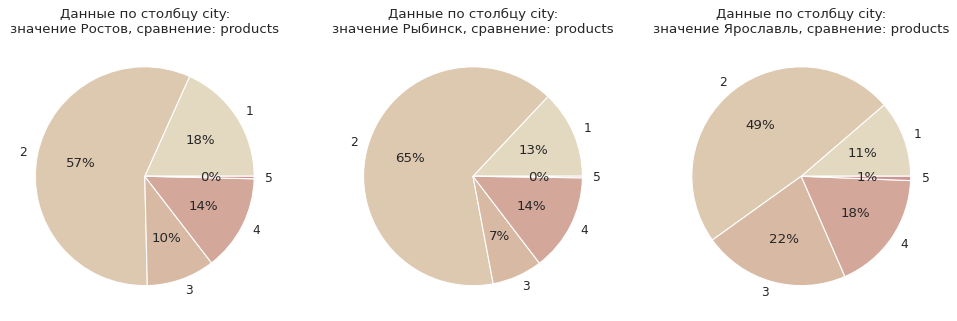

'Сравнение: last_activity'

city,Ростов,Рыбинск,Ярославль,diff
last_activity,,,,
0,34.0,26.0,31.0,8.0
1,66.0,74.0,69.0,-8.0


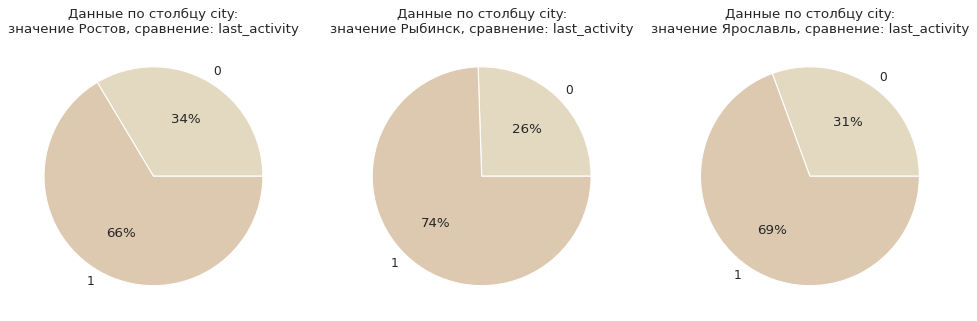

'Сравнение: score_type'

city,Ростов,Рыбинск,Ярославль,diff
score_type,,,,
низкий,NaN,NaN,0.0,NaN
ниже среднего,7.0,7.0,6.0,0.0
средний,43.0,35.0,35.0,8.0
выше среднего,43.0,50.0,51.0,-7.0
высокий,7.0,8.0,8.0,-1.0


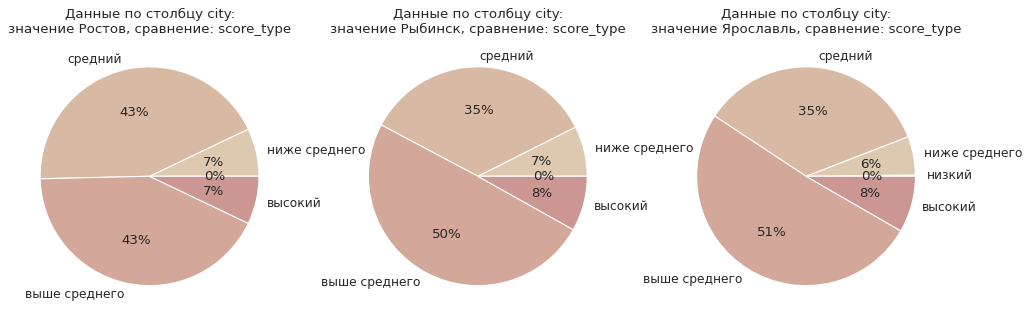

In [89]:
#сравним значения по городам

pie_loop('city')

Сравнение по городу проживания выявило различие по трем параметрам:

1) Количество продуктов. В Рыбинске в наибольшей степени пользуются двумя продуктами (65%), в Ростове - также двумя, но выше отношение одного продукта. Наибольшее разнообразие - в Ярославле: на 2 продукта приходится почти половина клиентов, но также популярны 3 и 4 продукта (22 и 18% соответственно).
<br>Приоритет: высокий, имеется значительное различие.

2) Активность. Пользователи из Рыбинска несколько активнее своих соседей.
<br>Приоритет: средний, размытый критерий.

3) Кредитный рейтинг. Самые хорошие показатели по кредитным рейтингам в Ярославле и Рыбинске (от 50% клиентов имеют рейтинг выше среднего), в Ростове доли клиентов со средним скорингом и рейтингом выше среднего равны (по 43%).
<br>Приоритет: высокий, имеется значительное различие.

<a id="portray_card"> </a>
<a name="portray_card"> </a>
### Сравнение характеристик ушедших клиентов по отсутствию/наличию кредитной карты

'Сравнение: enc_gender'

credit_card,0,1,diff
enc_gender,,,
женщины,44.0,28.0,16.0
мужчины,56.0,72.0,-16.0


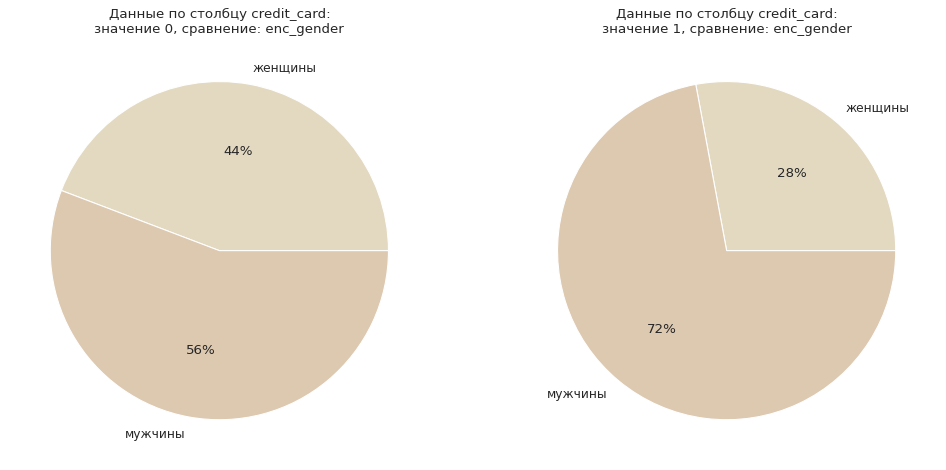

'Сравнение: city'

credit_card,0,1,diff
city,,,
Ростов,17.0,14.0,3.0
Рыбинск,26.0,22.0,4.0
Ярославль,57.0,64.0,-7.0


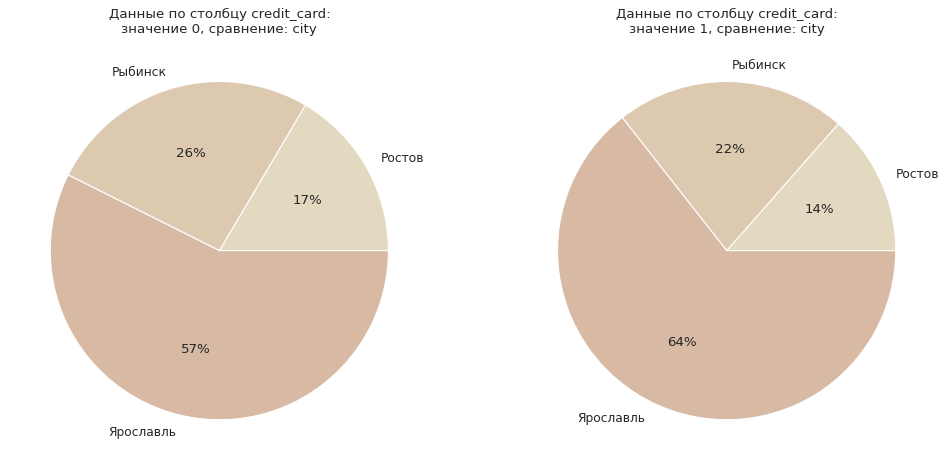

'Сравнение: equity'

credit_card,0,1,diff
equity,,,
0,4.0,6.0,-2.0
1,3.0,7.0,-4.0
2,7.0,11.0,-4.0
3,16.0,19.0,-3.0
4,28.0,24.0,4.0
5,36.0,28.0,8.0
6,7.0,5.0,2.0


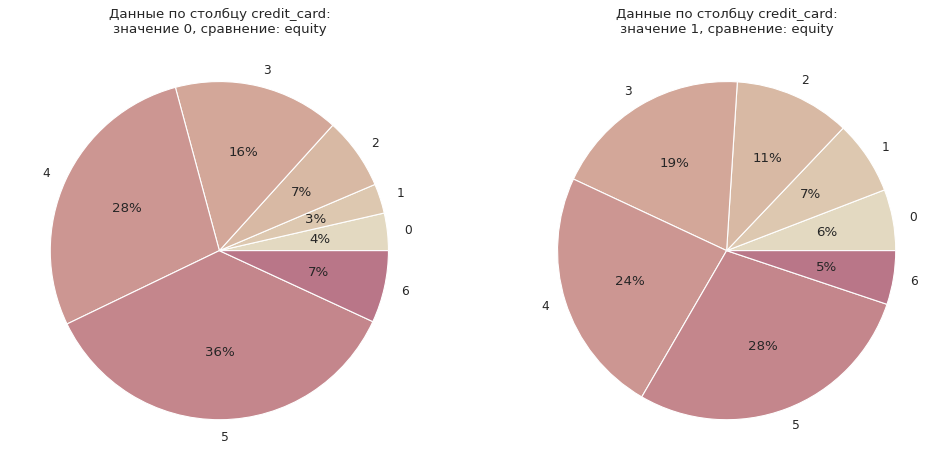

'Сравнение: products'

credit_card,0,1,diff
products,,,
1,3.0,21.0,-18.0
2,64.0,45.0,19.0
3,25.0,10.0,15.0
4,8.0,23.0,-15.0
5,0.0,1.0,-1.0


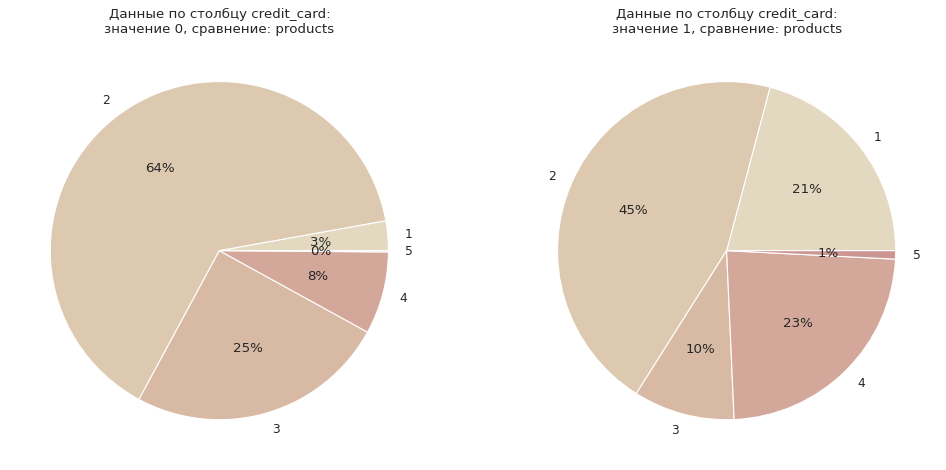

'Сравнение: last_activity'

credit_card,0,1,diff
last_activity,,,
0,25.0,34.0,-9.0
1,75.0,66.0,9.0


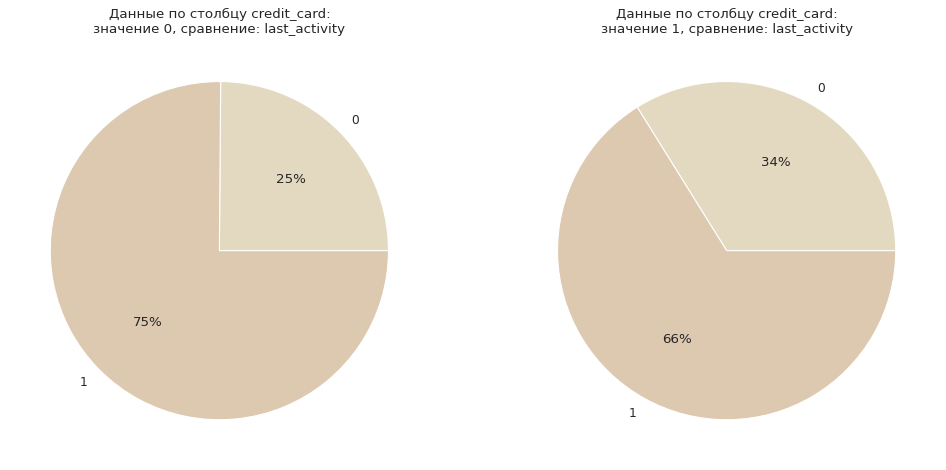

'Сравнение: balance_type'

credit_card,0,1,diff
balance_type,,,
< 20 тыс.,1.0,2.0,-1.0
20+ - 300 тыс.,12.0,21.0,-9.0
300+ - 550 тыс,14.0,25.0,-11.0
550+ тыс. - 1 млн.,25.0,20.0,5.0
>= 1 млн.,48.0,32.0,16.0


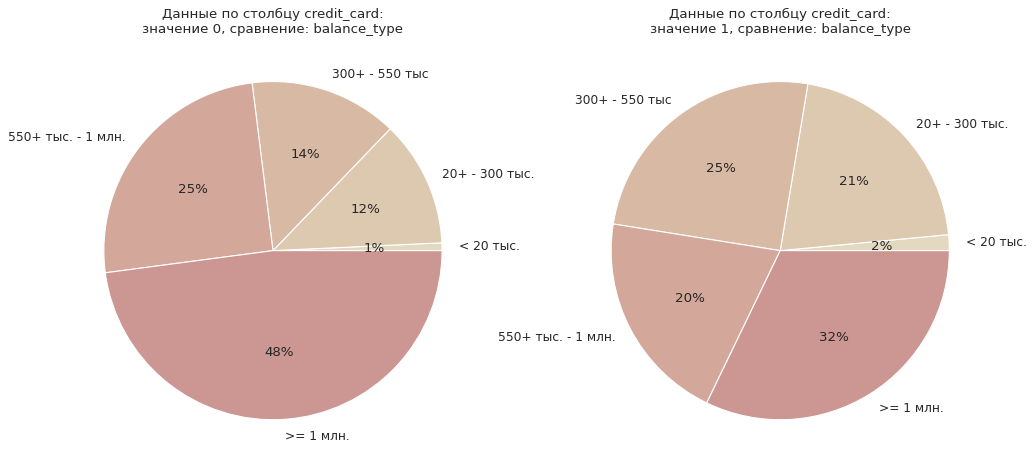

'Сравнение: age_type'

credit_card,0,1,diff
age_type,,,
< 35 лет,33.0,35.0,-2.0
35-44 лет,27.0,32.0,-5.0
45-55 лет,19.0,19.0,0.0
> 55 лет,21.0,14.0,7.0


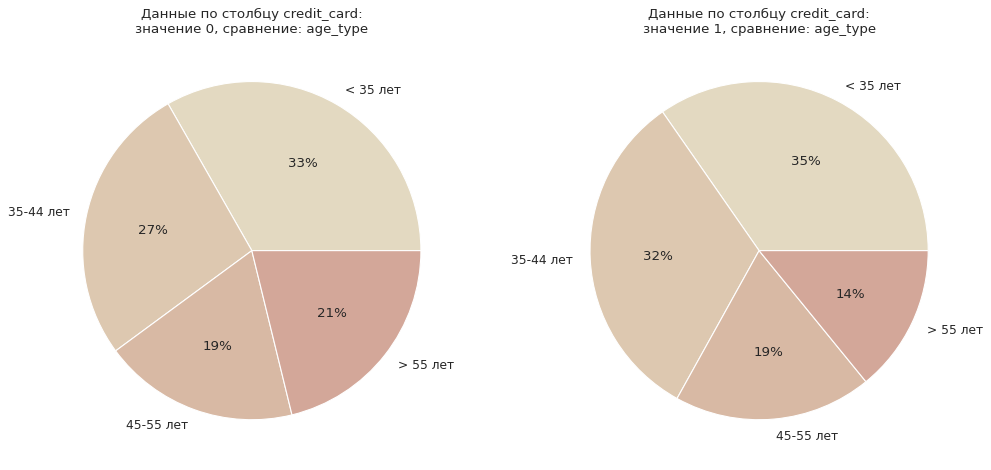

'Сравнение: score_type'

credit_card,0,1,diff
score_type,,,
низкий,NaN,0.0,NaN
ниже среднего,3.0,9.0,-6.0
средний,29.0,42.0,-13.0
выше среднего,58.0,42.0,16.0
высокий,10.0,7.0,3.0


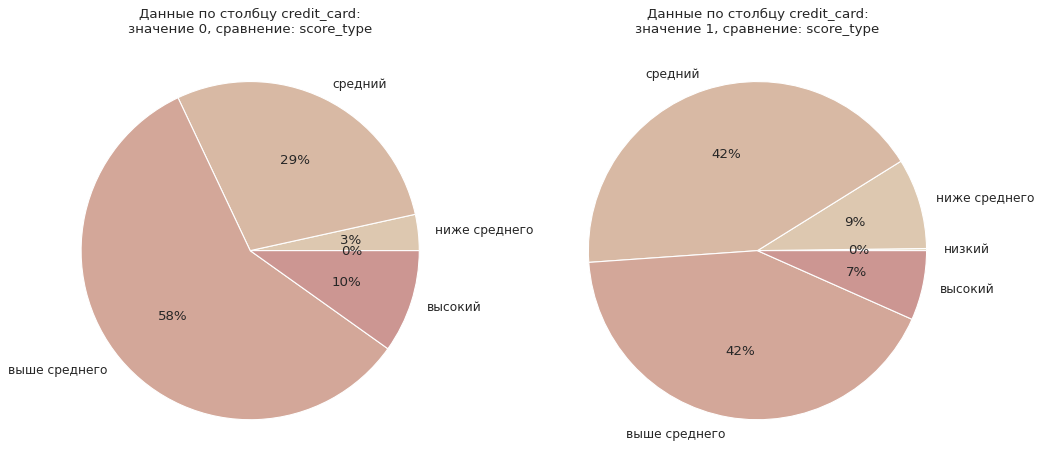

In [90]:
#сравним значения по кредитной карте

pie_loop('credit_card')

Сравнение категорий бывших клиентов, у которых были или отсутствовали банковские карты, имеет значительное количество различий. 

1) Пол. Как было установлено ранее, процент мужчин, которые пользуются кредитными картами, гораздо выше, чем женщин - 72 против 56%.
<br>Приоритет: высокий, различие значительно.

2) Город проживания. Чаще всего кредитные карты использовали клиенты из Ярославля, но и на этот же город приходится наибольшая пропорция ушедших клиентов без карт.
<br>Приоритет: средний, различие не столь значительно, Ярославль является лидером по всем показателям.

3) Количество объектов. Кредитной картой чаще предпочитали не пользоваться ушедшие клиенты с большим количеством недвижимости - 4 (28%) и особенно 5 объектов (36%). Однако процентное соотношение в обеих категориях довольно близкое.
<br>Приоритет: средний, различие не столь значительно.

4) Количество продуктов. Подавляющее большинство клиентов без кредитной карты пользуется двумя (64%) или тремя (25%) продуктами. Пользователи с кредитной картой также отдают предпочтение двум продуктам, но в гораздо меньшем соотношении (45%), а также четырем (23%) и одному (21%).
<br>Приоритет: высокий, различие значительно.

5) Активность. Пользователи кредитных карт несколько менее активно пользовались услугами банка перед уходом.
<br>Приоритет: средний, различие не столь значительно.

6) Баланс. Почти половина клиентов без кредитной карты имеет высокий баланс — от миллиона и более (48%), далее идет баланс выше среднего (от 550 тысяч, 25%). У пользователей кредитных карт также на первом месте идет высокий баланс, но его процентное соотношение ниже (32%), а следом идет баланс от 300 до 550 тысяч (25%).
<br>Приоритет: высокий, различие значительно, можно провести дополнительную проверку.

7) Возраст. Чаще предпочтение кредитным картам в процентном соотношении отдает молодое поколение, наибольшая разница в пропорциях - после 55 лет (21% против 14%, что может объясняться также сложностью получения кредита в пожилом возрасте)
<br>Приоритет: средний, различие не столь значительно.

8) Кредитный рейтинг. У ушедших пользователей без кредитных карт гораздо чаще встречается кредитный рейтинг выше среднего (58%), в то время как у владельцев кредитных карт равное соотношение тех, у кого средний рейтинг и рейтинг выше среднего (42%). 
<br>Приоритет: высокий, различие значительно.

'Сравнение: enc_gender'

last_activity,0,1,diff
enc_gender,,,
женщины,24.0,40.0,-16.0
мужчины,76.0,60.0,16.0


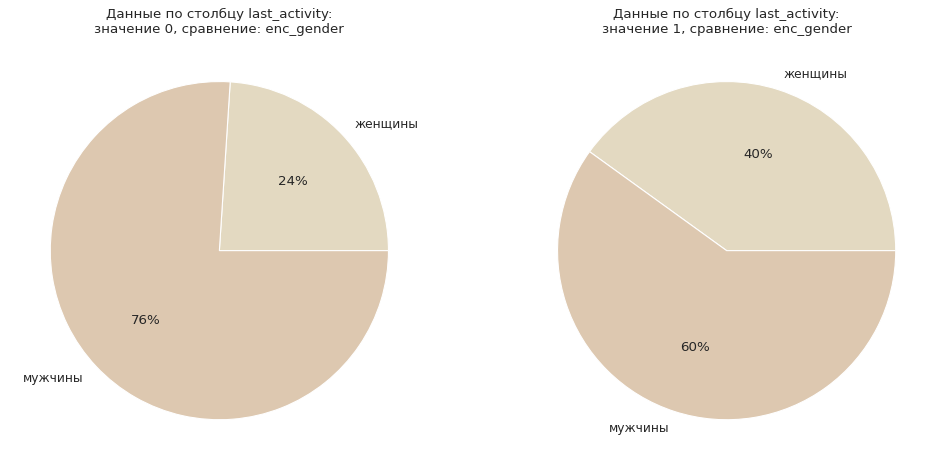

'Сравнение: products'

last_activity,0,1,diff
products,,,
1,14.0,12.0,2.0
2,46.0,57.0,-11.0
3,22.0,14.0,8.0
4,17.0,16.0,1.0
5,0.0,1.0,-1.0


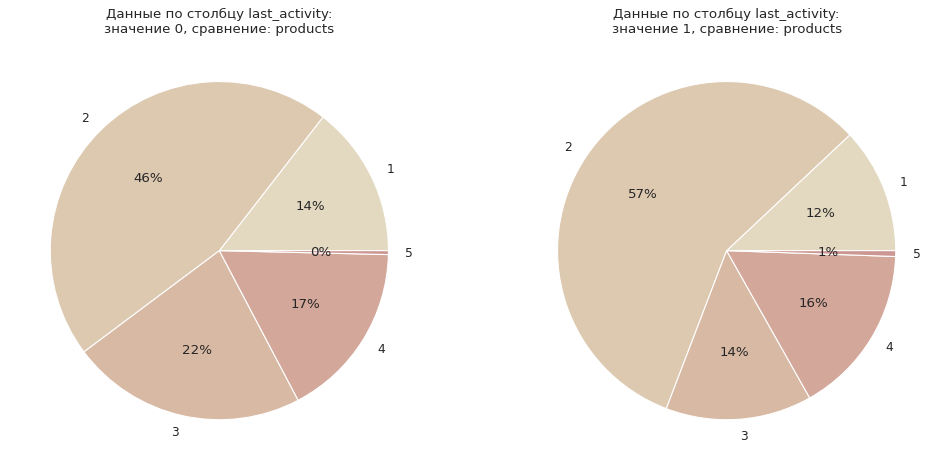

'Сравнение: credit_card'

last_activity,0,1,diff
credit_card,,,
0,38.0,48.0,-10.0
1,62.0,52.0,10.0


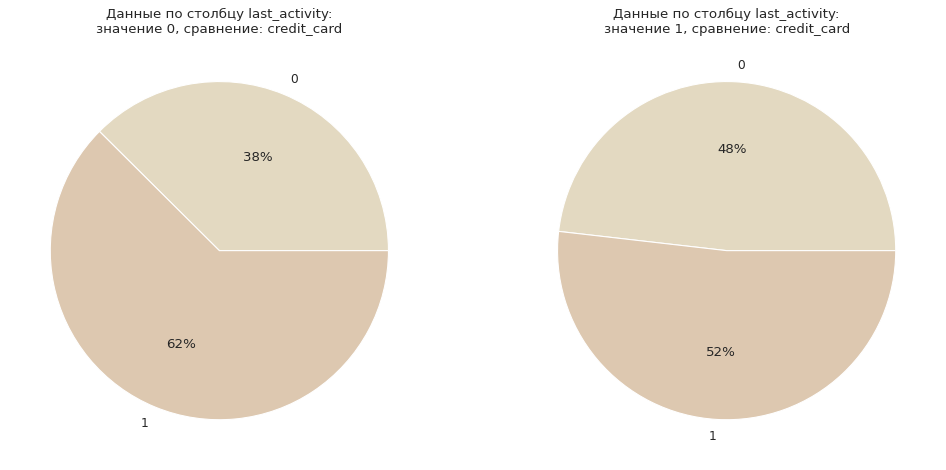

'Сравнение: balance_type'

last_activity,0,1,diff
balance_type,,,
< 20 тыс.,2.0,1.0,1.0
20+ - 300 тыс.,23.0,14.0,9.0
300+ - 550 тыс,21.0,20.0,1.0
550+ тыс. - 1 млн.,15.0,26.0,-11.0
>= 1 млн.,38.0,40.0,-2.0


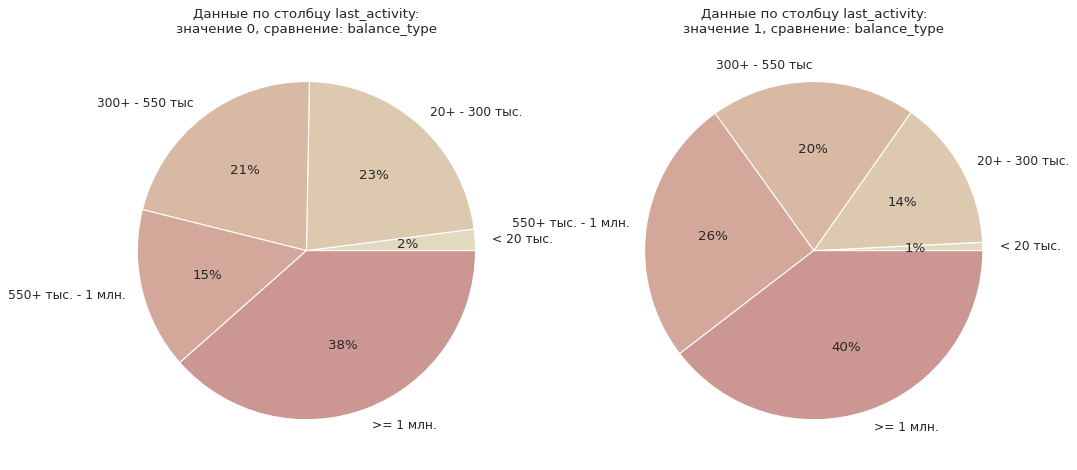

'Сравнение: salary_type'

last_activity,0,1,diff
salary_type,,,
< 60 тыс.,18.0,12.0,6.0
60+ - 100 тыс.,21.0,21.0,0.0
100+ - 135 тыс,19.0,22.0,-3.0
135+ - 180 тыс.,20.0,22.0,-2.0
>= 180 тыс.,22.0,23.0,-1.0


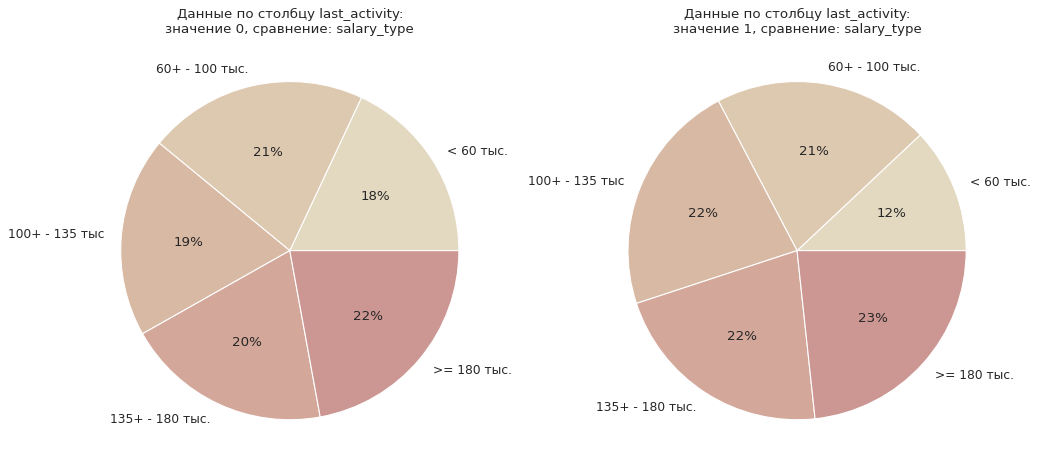

'Сравнение: age_type'

last_activity,0,1,diff
age_type,,,
< 35 лет,23.0,39.0,-16.0
35-44 лет,31.0,29.0,2.0
45-55 лет,24.0,17.0,7.0
> 55 лет,22.0,15.0,7.0


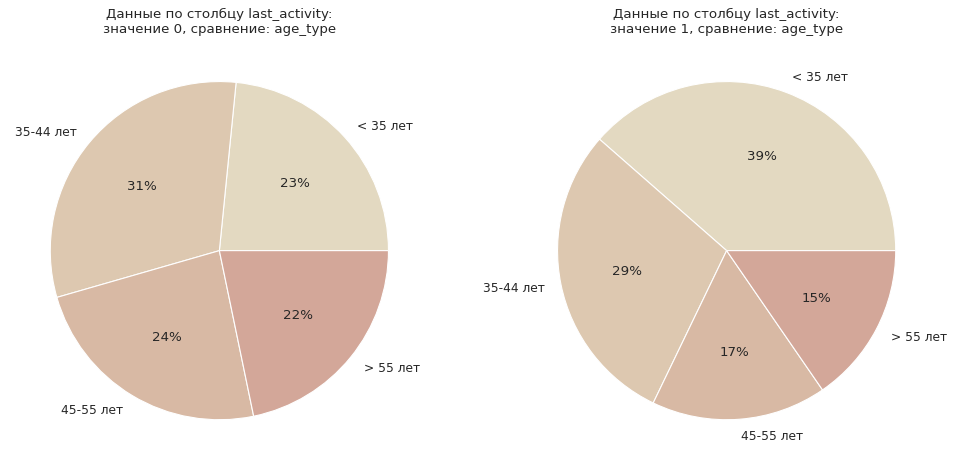

'Сравнение: score_type'

last_activity,0,1,diff
score_type,,,
низкий,0.0,0.0,0.0
ниже среднего,11.0,4.0,7.0
средний,44.0,33.0,11.0
выше среднего,36.0,55.0,-19.0
высокий,9.0,8.0,1.0


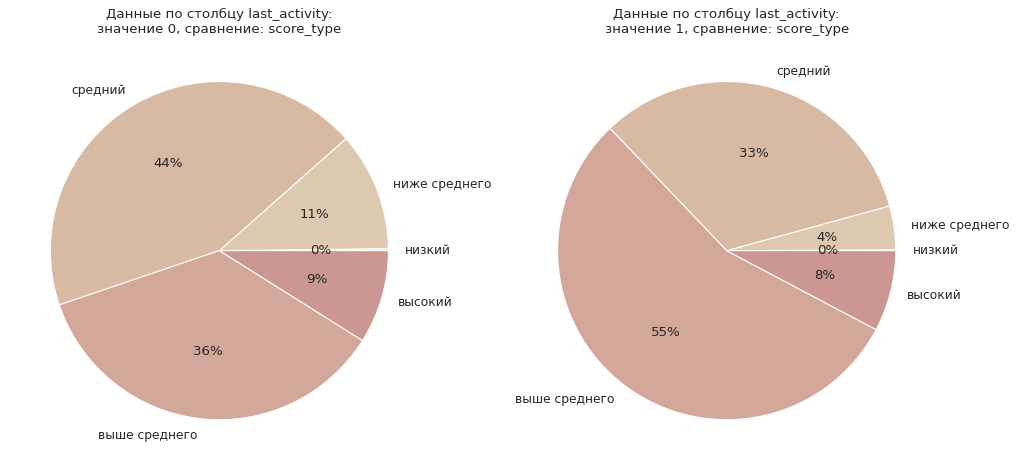

In [91]:
#сравним значения по активности

pie_loop('last_activity')

Всем оценкам активности мы присвоим по умолчанию средний приоритет, т.к. это достаточно расплывчатый критерий (нет данных за какое время активность, какого рода и т.д.)

1) Пол. Доля активных женщин, которые ушли из банка, выше, чем неактивных в 1,6 раз.

2) Количество продуктов. У активных клиентов несколько чаще встречается 2 продукта.

3) Кредитная карта. У активных клиентов имеется преобладание в отношении неиспользования кредитных карт по сравнению с неактивными (48 против 38%), в то время как неактивные пользователи гораздо чаще предпочитают кредитные карты (62 против 52%).

4) Баланс. У активных клиентов чаще встречается баланс от 550 тысяч до 1 млн. рублей (26% против 15%) и реже - баланс ниже среднего (14% против 23%), остальные пропорции близки.

5) Доход. Представители категории с низким доходом чаще не проявляют активности (18% против 12%).

6) Возраст. Наиболее активны молодые люди до 35 лет (39%), чаще пассивно пожилое поколение (22%).

7) Кредитный рейтинг. Более половины активных клиентов составляют люди с кредитным рейтингом выше среднего (55%), у пассивных доля выше у среднего рейтинга (44%).

<a id="third_conclusion"> </a>
<a name="third_conclusion"> </a>
### Вывод по этапу

По итогам анализа **выявлена практически отсутствующая корреляция между фактом расторжения договора и остальными характеристиками**. 
<br>Среди отдельных параметров, присущих ушедшим клиентам, наибольшую корреляцию (нижняя шкала умеренной корреляции) имеют баланс и кредитный рейтинг, доход и баланс, а также тип баланса и количество объектов в собственности.


Группировка по отдельным показателям (создание портретов клиента) - пол, город, кредитная карта, активность, показала наличие различий внутри объединенных групп.

**По полу:** преобладание женской доли в числе пользователей, не имевших кредитную карту (56%), преимущественная активность женщин (80%) и их более равномерное распределение по возрасту, в то время как ушедшие из банка мужчины имели более высокий доход и молодой возраст.

**По городу:** значительное преобладание в Рыбинске бывших клиентов с двумя продуктами (65%) и достаточная высокая доля клиентов с тремя продуктами в Ярославле (22%), более высокая активность в Рыбинске, а также несколько более низкий общий кредитный рейтинг в Ростове по сравнению с остальными городами.


**По кредитной карте:** преобладание пользователей кредитных карт из Ярославля (64%), а также лиц мужского пола (72%) и представителей молодого поколения, для ушедших клиентов без кредитных карт характерны наибольшая активность, обладание двумя и тремя продуктами, высокий баланс и более высокий кредитный рейтинг.

**По активности:** более активными клиентами являлись женщины, пользователи с 2 продуктами, клиенты с балансом от 550 тысяч, высоким доходом и кредитным рейтингом выше среднего, не владеющие кредитными картами и в возрасте до 35 лет.

<a id="hypothesis"> </a>
<a name="hypothesis"> </a>
## Проверка статистических гипотез

В рамках проверок, которые проведем с помощью t-текста, т.к. нас интересуют различия в средних показателях, установим уровень статистической значимости на распространенный в статистических исследованиях уровень в 0.05: на этом уровне находится критический промежуток, при попадании в который нулевая гипотеза отвергается, т.е. увеличивается вероятность ошибки первого рода (фиксируем разницу, хотя ее может не быть). 

<a id="hypothesis_salary_gender"> </a>
<a name="hypothesis_salary_gender"> </a>
### Проверка гипотезы: средние доходы мужчин и женщин, которые расторгли договор, равны

В ходе исследовательского анализа мы выявили ряд характеристик клиентов, потенциально склонных к уходу. В их числе - разница в категориях доходах мужчин и женщин, расторгших договор. Проверим гипотезу о равенстве этих параметров.

``H_0: средние доходы мужчин и женщин, которые расторгли договор, равны``

`` H_a: средние доходы мужчин и женщин, которые расторгли договор, не равны``

In [92]:
#сравним показатели

display('Средний доход мужчин: {:.2f}'\
        .format(df.query('churn == 1 and enc_gender == 1')['est_salary'].mean()))
display('Средний доход женщин: {:.2f}'\
        .format(df.query('churn == 1 and enc_gender == 0')['est_salary'].mean()))

'Средний доход мужчин: 145305.05'

'Средний доход женщин: 138086.23'

In [93]:
#проверим равенство методом из библиотеки scipy

first = df.query('churn == 1 and enc_gender == 0')['est_salary']
second = df.query('churn == 1 and enc_gender == 1')['est_salary']

alpha = .05

results = st.ttest_ind(first, second, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.15342361125404344
Не получилось отвергнуть нулевую гипотезу


Несмотря на то, что у ушедших мужчин и ушедших женщин лидируют различные категории дохода как было установлено на предыдущем этапе, а средний доход у клиентов мужского пола на 7 тысяч превышает доход клиентов-женщин, отвергнуть гипотезу о равенстве средних доходов не получилось: их средние доходы не имеют статистически значимых отличий.

<a id="hypothesis_age"> </a>
<a name="hypothesis_age"> </a>
### Проверка гипотезы: средний возраст ушедших клиентов, которые имели кредитную карту и которые не пользовались ей, равен

Проверим средний возраст ушедших клиентов в зависимости от факта использования кредитной карты. По итогам рассмотрения данной характеристики на предыдущем этапе мы присудили ей средний уровень значимости ввиду близкого соотношения в пропорциях между возрастом пользователей кредитной карты и клиентов, ее не имеющих. Проверим, верно ли наше предположение или данному показателю следует уделить больше внимания.

``H_0: средний возраст клиентов, расторших договор, которые пользовались кредитной картой и ее не имели, равен ``

``H_a: средний возраст клиентов, расторших договор, которые пользовались кредитной картой и ее не имели, не равен``

In [94]:
#сравним показатели

display('Средний возраст клиентов без кредитной карты: {:.2f}'\
        .format(df.query('churn == 1 and credit_card == 0')['age'].mean()))
display('Средний возраст клиентов с кредитной картой: {:.2f}'\
        .format(df.query('churn == 1 and credit_card == 1')['age'].mean()))

'Средний возраст клиентов без кредитной карты: 42.24'

'Средний возраст клиентов с кредитной картой: 40.63'

In [95]:
#проверим равенство методом из библиотеки scipy

first = df.query('churn == 1 and credit_card == 0')['age']
second = df.query('churn == 1 and credit_card == 1')['age']

alpha = .05

results = st.ttest_ind(first, second, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0020476426614262607
Отвергаем нулевую гипотезу


Гипотеза не подтвердилась: средний возраст у этих двух категорий оказался различным. Хотя, на первый взгляд, различие невелико - всего 2 года.

<a id="hypothesis_balance"> </a>
<a name="hypothesis_balance"> </a>
### Проверка гипотезы: средний баланс клиентов, которые имели кредитную карту и которые не пользовались ей, равен

На предыдущем этапе мы также выявили несовпадение в пропорциях категории баланса ушедших клиентов с кредитной картой и без нее. Проверим, равен ли их средний баланс.

``H_0: средний баланс клиентов, расторших договор, которые пользовались кредитной картой и ее не имели, равен``

``H_a: средний баланс клиентов, расторших договор, которые пользовались кредитной картой и ее не имели, не равен``

In [96]:
#сравним показатели

display('Средний баланс клиентов без кредитной карты: {:.2f}'\
        .format(df.query('churn == 1 and credit_card == 0')['balance'].mean()))
display('Средний баланс клиентов с кредитной картой: {:.2f}'\
        .format(df.query('churn == 1 and credit_card == 1')['balance'].mean()))

'Средний баланс клиентов без кредитной карты: 1194051.01'

'Средний баланс клиентов с кредитной картой: 857698.12'

In [97]:
#проверим равенство методом из библиотеки scipy

first = df.query('churn == 1 and credit_card == 0')['balance']
second = df.query('churn == 1 and credit_card == 1')['balance']

alpha = .05

results = st.ttest_ind(first, second, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.174043620064902e-14
Отвергаем нулевую гипотезу


Предыдущие выводы подтвердились: баланс таких клиентов действительно различен, в том числе по среднему значению.

<a id="fourth_conclusion"> </a>
<a name="fourth_conclusion"> </a>
### Вывод по этапу

По итогам проведенного t-тестирования подтвердилась только одна гипотеза - о равенстве средних доходов мужчин и женщин, расторгших договор. Другие нулевые гипотезы, связанные с наличием кредитной карты - о равенстве возраста и баланса тех ушедших клиентов, которые являлись держателем кредитных карт и их не имели, были отвергнуты. Ни одно полученное значение не оказалось в промежутке от 0.01 до 0.1 - следовательно, выбор уровня значимости в 0.05 оказался оптимальным и снижение его значения до более высоких или низких показателей, распространенных в исследованиях, не требуется. 

<a id="segments"> </a>
<a name="segments"> </a>
## Сегментация на основе стратегических показателей

<a id="segments_results"> </a>
<a name="segments_results"> </a>
### Результат сегментирования

В рамках предыдущих этапов мы получили следующие результаты:
- выявили наиболее характерные черты клиентов, которые расторгают договор (преимущественно активные мужчины до 45 лет, проживающие в Ярославле, с достаточным доходом, обладающие кредитной картой, 3-5 объектами и от 2 до 4 продуктов, имеющие кредитный рейтинг от среднего и выше, баланс от 300 тысяч);
- выявили более узкие описания клиентов по ряду критериев, наиболее крупными и значимыми по приоритету оказались пол и наличие кредитной карты (как, например, преимущественное использование карт клиентами с более низким рейтингом, разница в возрастных категориях мужчин и женщин и т.д.). 

Сегментирование клиентов будет осуществляться следующим образом:

1) Выделение крупного сегмента - определим, какое количество клиентов соответствуют типичному портрету пользователя, склонному к расторжению договора (т.е. общим характеристикам);

2) Выделение более узких сегментов - разделение клиентов на категории (и их численная оценка), которые будут включать как ряд общих черт, присущих ушедшим клиентам, так и уникальные особенности для своего сегмента. 

In [98]:
#выделим крупный сегмент
#для этого создадим срез по всем наиболее значимым категориям клиентов,
#которые ушли

huge_segment = (churn.
                query(
                'gender == "М" \
                and city == "Ярославль" \
                and age < 45 \
                and est_salary > 60000 \
                and 3 <= equity <= 5 \
                and 2 <= products <= 4 \
                and credit_card == 1 \
                and score_type >= 2 \
                and balance > 300000')
               )

display(f'объем крупного сегмента составляет: {huge_segment.shape[0]} записей')
display('процент от ушедших: {:.2%}'.format(huge_segment.shape[0] / churn.shape[0]))

'объем крупного сегмента составляет: 150 записей'

'процент от ушедших: 8.31%'

В состав крупного сегмента вошло 150 человек, которые характеризуют собой типичных клиентов, склонных к расторжению договора.
Такой позволяет нам максимально точно определить группу клиентов, которые находятся в зоне риска, однако столь небольшое количество человек не позволяет проводить маркетинговые кампании. Следовательно, выделим более крупные группы на основе комбинирования трех параметров из харктеристик, присущих уходящим клиентам.

In [99]:
#вынесем в отдельный словарь все характеристики для формирования среза данных

general_treats = {'salary': (churn['est_salary'] > 60000), 
                  'age': (churn['age'] < 45), 
                  'equity': ((churn['equity'] >= 3) | (churn['equity'] <= 5)),
                  'city': (churn['city'] == "Ярославль"), 
                  'gender': (churn['gender'] == "М"),
                  'products': ((churn['products'] >= 2) | (churn['products'] <= 4)),
                  'credit_card': (churn['credit_card'] == 1),
                  'score': (churn['score_type'] >= 2),
                  'balance': (churn['balance'] >= 300000)}

In [100]:
#создадим функцию, которая обеспечит перебор параметров

#принимаем на вход список со срезами и нужным датафреймом
def segments(data, dfrm):
    
    #временный список для хранения комбинации параметров
    check = []

    #формируем список сегментов
    seg = []

    
    #перебираем по всем трем параметрам и проверяем, чтобы они не совпали
    for i in data:
        for j in data:
            if i != j:
                for k in data:
                    if k != i and k != j:
                        
                        #формируем комбинацию и проверяем, не было ли ее
                        temp = sorted([i, j, k])
                        if temp not in check:
                            check.append(temp)
                            
                            #формируем новый срез
                            new_segment = dfrm.loc[data[i] & data[j] & data[k]]

                            #считаем процент от ушедших и выводим результат, если он более 60%
                            pcnt_from_total = round(new_segment.shape[0] / dfrm.shape[0] * 100)
                            if pcnt_from_total >= 60:
                                seg.append(f'объем сегмента с параметрами {i}, {j}, {k} '
                                        f'составляет: {new_segment.shape[0]} '
                                        f'или {pcnt_from_total}% от ушедших')
    return sorted(seg, key=lambda prct: prct[-14:-12], reverse=True)

In [101]:
#выявим более крупные сегменты

segments(general_treats, churn)

['объем сегмента с параметрами equity, products, score составляет: 1688 или 94% от ушедших',
 'объем сегмента с параметрами salary, equity, products составляет: 1555 или 86% от ушедших',
 'объем сегмента с параметрами equity, products, balance составляет: 1478 или 82% от ушедших',
 'объем сегмента с параметрами salary, equity, score составляет: 1469 или 81% от ушедших',
 'объем сегмента с параметрами salary, products, score составляет: 1469 или 81% от ушедших',
 'объем сегмента с параметрами equity, score, balance составляет: 1418 или 79% от ушедших',
 'объем сегмента с параметрами products, score, balance составляет: 1418 или 79% от ушедших',
 'объем сегмента с параметрами salary, equity, balance составляет: 1323 или 73% от ушедших',
 'объем сегмента с параметрами salary, products, balance составляет: 1323 или 73% от ушедших',
 'объем сегмента с параметрами salary, score, balance составляет: 1280 или 71% от ушедших',
 'объем сегмента с параметрами equity, gender, products составляет: 

С тремя значениями в комбинациях сегменты стали более весовыми. Наибольший процент пересечений приходится на следующие комбинации:
- 3-5 объектов, 2-4 продукта и рейтинг средний и выше: 94 % от ушедших клиентов;
- 3-5 объектов, 2-4 продукта и доход от 60 тысяч и выше: 86 % от ушедших клиентов;
- 3-5 объектов, 2-4 продукта и баланс от 300 тысяч: 82 % от ушедших клиентов.

Выделим более узкие сегменты по полу клиентов.

In [102]:
#выделим сегмент женщин, которые склонны к уходу из банка

gender_segment_f = (churn.
                query(
                'gender == "Ж" \
                and city == "Ярославль" \
                and est_salary > 135000 \
                and 3 <= equity <= 5 \
                and 2 <= products <= 4 \
                and credit_card == 0 \
                and score_type >= 2 \
                and balance > 300000')
               )

display(f'объем среднего сегмента (женщины) составляет: {gender_segment_f.shape[0]} записей')
display('процент от ушедших: {:.2%}'.format(gender_segment_f.shape[0] / churn.shape[0]))

'объем среднего сегмента (женщины) составляет: 84 записей'

'процент от ушедших: 4.66%'

In [103]:
#выделим сегмент мужчин, которые склонны к уходу из банка

gender_segment_m = (churn.
                query(
                'age < 45 and gender == "М" \
                and city == "Ярославль" \
                and est_salary > 135000 \
                and 3 <= equity <= 5 \
                and 2 <= products <= 4 \
                and credit_card == 1 \
                and score_type >= 2 \
                and balance > 300000')
               )

display(f'объем среднего сегмента (мужчины) составляет: '
        f'{gender_segment_m.shape[0]} записей')
display('процент от ушедших: {:.2%}'.format(gender_segment_m.shape[0] / churn.shape[0]))

'объем среднего сегмента (мужчины) составляет: 93 записей'

'процент от ушедших: 5.16%'

Объем женского сегмента получился несколько меньше, чем мужского (84 женщины и 93 мужчины или 4,7 и 5.2% от ушедших) - однако, это подтверждается тем фактом, что мужчины чаще расторгают договор.

Для проведения маркетинговых исследований выделим более широкие сегменты в рамках сравнения по полу. 

In [104]:
#вынесем в отдельный словарь все характеристики для формирования среза данных
#по клиентам женского пола

female_treats = {'salary': (churn['est_salary'] > 135000), 
                  'equity': ((churn['equity'] >= 3) | (churn['equity'] <= 5)),
                  'city': (churn['city'] == "Ярославль"), 
                  'products': ((churn['products'] >= 2) | (churn['products'] <= 4)),
                  'credit_card': (churn['credit_card'] == 0),
                  'score': (churn['score_type'] >= 2),
                  'balance': (churn['balance'] >= 300000)}

#создадим отдельную переменную, куда войдут только женщины
female_churn = churn.query('gender == "Ж"')

In [105]:
#выявим более крупные сегменты среди женщин

segments(female_treats, female_churn)

['объем сегмента с параметрами equity, products, score составляет: 607 или 95% от ушедших',
 'объем сегмента с параметрами equity, products, balance составляет: 535 или 84% от ушедших',
 'объем сегмента с параметрами equity, score, balance составляет: 520 или 82% от ушедших',
 'объем сегмента с параметрами products, score, balance составляет: 520 или 82% от ушедших',
 'объем сегмента с параметрами equity, city, products составляет: 410 или 64% от ушедших',
 'объем сегмента с параметрами equity, city, score составляет: 392 или 62% от ушедших',
 'объем сегмента с параметрами city, products, score составляет: 392 или 62% от ушедших']

Среди женщин наиболее заметными сегментами (от 82 до 95%) стали следующие: 
- 3-5 объектов, 2-4 продукта и рейтинг средний и выше: 95 % от ушедших женщин;
- 3-5 объектов, 2-4 продукта и баланс от 300 тысяч: 84 % от ушедших женщин;
- 3-5 объектов, баланс от 300 тысяч и доход от 60 тысяч и выше: 82 % от ушедших женщин;
- 3-5 объектов, рейтинг средний и выше и баланс от 300 тысяч: 82 % от ушедших женщин

In [106]:
#вынесем в отдельный словарь все характеристики для формирования среза данных
#по клиентам мужского пола

male_treats = {'salary': (churn['est_salary'] > 135000), 
                  'age': (churn['age'] < 45), 
                  'equity': ((churn['equity'] >= 3) | (churn['equity'] <= 5)),
                  'city': (churn['city'] == "Ярославль"), 
                  'products': ((churn['products'] >= 2) | (churn['products'] <= 4)),
                  'credit_card': (churn['credit_card'] == 1),
                  'score': (churn['score_type'] >= 2),
                  'balance': (churn['balance'] >= 300000)}

#создадим отдельную переменную, куда войдут только мужчины
male_churn = churn.query('gender == "М"')

In [107]:
#выделим сегменты среди клиентов мужского пола 

segments(male_treats, male_churn)

['объем сегмента с параметрами equity, products, score составляет: 1081 или 93% от ушедших',
 'объем сегмента с параметрами equity, products, balance составляет: 943 или 81% от ушедших',
 'объем сегмента с параметрами equity, score, balance составляет: 898 или 77% от ушедших',
 'объем сегмента с параметрами products, score, balance составляет: 898 или 77% от ушедших',
 'объем сегмента с параметрами age, equity, products составляет: 796 или 68% от ушедших',
 'объем сегмента с параметрами age, equity, score составляет: 742 или 64% от ушедших',
 'объем сегмента с параметрами age, products, score составляет: 742 или 64% от ушедших',
 'объем сегмента с параметрами equity, products, credit_card составляет: 715 или 61% от ушедших',
 'объем сегмента с параметрами equity, city, products составляет: 695 или 60% от ушедших']

Для мужчин также оказались справедливыми сегменты, выделенные для женщин, однако большинство из них имеют более низкий процент совпадений, из которых в сегменты с пересечением выше 80% вошли только два утвреждения:
- 3-5 объектов, 2-4 продукта и рейтинг средний и выше: 93 % от ушедших мужчин;
- 3-5 объектов, 2-4 продукта и баланс от 300 тысяч: 81 % от ушедших мужчин

Аналогично рассмотрим сегментирование по факту наличия кредитных карт.

In [108]:
#выделим сегмент ушедших клиентов, которые не пользовались кредитной картой 

card_segment_0 = (churn.
                query(
                'gender == "Ж" \
                and city == "Ярославль" \
                and est_salary > 135000 \
                and 3 <= equity <= 5 \
                and age < 45 \
                and 2 <= products <= 3 \
                and credit_card == 0 \
                and score_type >= 2 \
                and balance > 550000')
               )

display(f'объем среднего сегмента (пользователи без кредитных кард) '
        f'составляет: {card_segment_0.shape[0]} записей')
display('процент от ушедших: {:.2%}'.format(card_segment_0.shape[0] / churn.shape[0]))

'объем среднего сегмента (пользователи без кредитных кард) составляет: 45 записей'

'процент от ушедших: 2.49%'

In [109]:
#выделим сегмент клиентов с кредитной картой, склонны к уходу из банка

card_segment_1 = (churn.
                query(
                'gender == "М" \
                and city == "Ярославль" \
                and est_salary > 135000 \
                and 3 <= equity <= 5 \
                and age < 45 \
                and (products == 2 or products == 4) \
                and credit_card == 1 \
                and score_type >= 2 \
                and balance > 300000')
               )

display(f'объем среднего сегмента (пользователи c кредитными картами) '
        f'составляет: {card_segment_1.shape[0]} записей')
display('процент от ушедших: {:.2%}'.format(card_segment_1.shape[0] / churn.shape[0]))

'объем среднего сегмента (пользователи c кредитными картами) составляет: 90 записей'

'процент от ушедших: 4.99%'

Сегменты по факту пользования кредитной картой оказались достаточно небольшими - особенно в отношении тех, у кого карта отсутствует: 45 и 90 записей или 2,5 и 5% от всех ушедших соответственно. Рассмотрим более крупные сегменты.


In [110]:
#вынесем в отдельный словарь все характеристики для формирования среза данных
#по клиентам без кредитных карт

no_cards_treats = {'salary': (churn['est_salary'] > 135000), 
                  'age': (churn['age'] < 45), 
                  'equity': ((churn['equity'] >= 3) | (churn['equity'] <= 5)),
                  'city': (churn['city'] == "Ярославль"), 
                  'products': ((churn['products'] >= 2) | (churn['products'] <= 3)),
                  'score': (churn['score_type'] >= 2),
                  'balance': (churn['balance'] >= 550000),
                  'gender': (churn['gender'] == "Ж")}

#создадим отдельную переменную, куда войдут только клиенты без кредитных карт
no_cards_churn = churn.query('credit_card == 0')

In [111]:
#выделим сегменты среди клиентов без кредитной карты 

segments(no_cards_treats, no_cards_churn)

['объем сегмента с параметрами equity, products, score составляет: 784 или 97% от ушедших',
 'объем сегмента с параметрами equity, products, balance составляет: 593 или 73% от ушедших',
 'объем сегмента с параметрами equity, score, balance составляет: 583 или 72% от ушедших',
 'объем сегмента с параметрами products, score, balance составляет: 583 или 72% от ушедших',
 'объем сегмента с параметрами age, equity, products составляет: 488 или 60% от ушедших']

Среди пользователей без кредитных кард сегмент из параметров объектов, продуктов и кредитного рейтинга вновь стал наиболее крупным, а именно:
- количество продуктов от 2 до 3;
- объектов - от 3 до 5;
- кредитный рейтинг - средний и выше.

In [112]:
#вынесем в отдельный словарь все характеристики для формирования среза данных
#по клиентам с кредитными картами

cards_treats = {'salary': (churn['est_salary'] > 135000), 
                  'age': (churn['age'] < 45), 
                  'equity': ((churn['equity'] >= 3) | (churn['equity'] <= 5)),
                  'city': (churn['city'] == "Ярославль"), 
                  'products': ((churn['products'] >= 2) | (churn['products'] <= 4)),
                  'score': (churn['score_type'] >= 2),
                  'balance': (churn['balance'] >= 300000),
                  'gender': (churn['gender'] == "М")}

#создадим отдельную переменную, куда войдут только клиенты с картами
cards_churn = churn.query('credit_card == 1')

In [113]:
#выделим сегменты клиентов с кредитными картами 

segments(cards_treats, cards_churn)

['объем сегмента с параметрами equity, products, score составляет: 904 или 91% от ушедших',
 'объем сегмента с параметрами equity, products, balance составляет: 770 или 78% от ушедших',
 'объем сегмента с параметрами equity, score, balance составляет: 725 или 73% от ушедших',
 'объем сегмента с параметрами products, score, balance составляет: 725 или 73% от ушедших',
 'объем сегмента с параметрами equity, products, gender составляет: 715 или 72% от ушедших',
 'объем сегмента с параметрами age, equity, products составляет: 664 или 67% от ушедших',
 'объем сегмента с параметрами equity, score, gender составляет: 644 или 65% от ушедших',
 'объем сегмента с параметрами products, score, gender составляет: 644 или 65% от ушедших',
 'объем сегмента с параметрами equity, city, products составляет: 639 или 64% от ушедших',
 'объем сегмента с параметрами age, equity, score составляет: 612 или 62% от ушедших',
 'объем сегмента с параметрами age, products, score составляет: 612 или 62% от ушедших'

Среди пользователей кредитных кард наиболее распространенным сегментом стали обладатели 3-5 объектов, 2-4 продуктов и рейтинга средний и выше: 91 %. Особых отличий в сегментах среди клиентов с и без кредитной картой не выявлено. 

<a id="conclusion"> </a>
<a name="conclusion"> </a>
## Выводы и рекомендации по проекту

**ВЫВОДЫ**

Около 20% клиентов банка, информация о которых содержалась в датафрейме, расторгли договор.

На основе проведенного ранее портретирования клиентов банка мы получили **общие данные, которые характеризуют клиентов, расторгших договор**:

- преобладание мужчин (65 на 35%);
- преимущественное проживание в Ярославле (61%);
- возраст до 45 лет (64% в сумме);
- доход от 60 тысяч и выше;
- от 3 до 5 объектов собственности;
- от 2 до 4 продуктов в банке;
- наличие у более половины банковской карты (55%);
- кредитный рейтинг выше среднего (49%) и средний (36%);
- баланс от 300 тысяч;
- проявление активности в работе с банковскими продуктами (70%).

Также у таких клиентов имеется **умеренная корреляция таких признаков**, как:
- баланс и кредитный рейтинг;
- доход и баланс;
- тип баланса и объекты в собственности.

Всех клиентов также можно разделить на **две крупные категории, которые имеют некие различия внутри себя**, а именно: 
- по полу;
- по наличию кредитной карты;

Разделив клиентов **по половому признаку** и проанализировав их поведение, мы выявили следующие наиболее характерные черты:
- женщины чаще предпочитают не пользоваться кредитной картой, нежели использовать ее;
- женщины гораздо более активны в пользовании сервисами, чем мужчины;
- у женщин выше доля тех, кто получает доход 135-180 тысяч, в то время как у мужчин преобладает группа с доходом от 180 тысяч и выше, однако гипотеза о равенстве среднего дохода была подтверждена;
- возраст женщин, которые расторгают договор, более сбалансирован, чем у мужчин, где явное преобладание имеет поколение до 45 лет; в то же время, как показала проверка гипотезы, средний возраст двух групп не равен.

**Клиенты, проживающие в разных городах**, имеют не столь много различий. Но наиболее значимыми из них являются:
- при преобладании клиентов с двумя продуктами наибольшая доля (65%) характерна для Рыбинска, наименьшая - для Ярославля (49%, где высок вес трех продуктов);
- самые высокие показатели по кредитным рейтингам - в Ярославле и Рыбинске (доля выше среднего - 50%), в Ростове равная доля клиентов со средним балансом и балансом выше среднего (по 43%).

Группировка **по факту наличия кредитной карты** оказалась наиболее интересной в плане различий, в числе которых:
- процент мужчин, которые пользуются кредитными картами, гораздо выше, чем женщин (72 и 28% соответственно);
- у клиентов без кредитной карты выше доля клиентов с балансом от 1 млн рублей (48 против 32%), а также балансом выше среднего (25 против 20%), средние доходы не равны, что подтвердила проверка гипотезы;
- гораздо большее число клиентов без кредитной карты предпочитают два (64%) или три (25%) продукта, в то время как у клиентов с кредитными картами чаще встречаются два (45%) и четыре (23%) продукта;
- более высокий процент клиентов с кредитным рейтингом выше среднего (58% против 42%) у тех, кто не имел кредитной карты;
- средний возраст клиентов с кредитной картой и без нее не равен согласно результатам проверки гипотезы. 


По результатам сегментирования, которое опиралось как на общее описание ушедших пользователей, так и наиболее крупные и значимые по приоритету портретные группы, **были выделены следующие узкие категории клиентов, совокупность которых может означать высокую вероятность ухода**:

- клиенты, входящие в крупный сегмент, критерии которого соответствуют общим характеристикам пользователей, расторгших договор (8,3% от ушедших клиентов, если учитывать только мужской пол и проживание в Ярославле;
- клиенты, входящие в более узкие сегменты, а именно:
 - мужчины и женщины, которые имеют отличительные черты для своего пола, а также остальные черты потенциально нелояльных клиентов (4.7 и 5.2% от ушедших клиентов);
 - пользователи кредитных карт и те, кто предпочитает обходиться без них: аналогичная сегментация по отличительным и общим характеристикам (5 и 2,5% соответственно). 

**Для проведения работы по линии маркетинга выделены более широкие сегменты на основе комбинирования 3-4 показателей**. 
Значительную долю клиентов (в том числе отдельно среди мужчин и женщин, а также клиентов в зависимости от наличия кредитной карты), которые подвержены оттоку (от 60% и выше), дали **комбинации на основе высокого дохода (от 60 тысяч и выше), кредитного рейтинга не ниже среднего, высокого баланса, наличия 3-5 объектов и 2-4 продуктов**. В частности, самыми крупными сегментами среди всех ушедших пользователей стали клиенты, у которых:
- 3-5 объектов, 2-4 продукта и рейтинг средний и выше: 94 % от ушедших клиентов;
- 3-5 объектов, 2-4 продукта и доход от 60 тысяч и выше: 86 % от ушедших клиентов;
- 3-5 объектов, 2-4 продукта и баланс от 300 тысяч: 82 % от ушедших клиентов.

Среди мужчин наиболее актуальными сегментами стали первый и третий сегмент, общие для всех клиентов выше. Для женщин, помимо этих двух сегментов, также актуальны такие характеристики, как:
- 3-5 объектов, баланс от 300 тысяч и доход от 60 тысяч и выше: 82 % от ушедших женщин;
- 3-5 объектов, рейтинг средний и выше и баланс от 300 тысяч: 82 % от ушедших женщин.

Пользователи с и без кредитных кард совпали в своих сегментах, подверженных уходу, исходя из параметров объектов (3-5), продуктов (2 и 3 для пользователей без карты и 2-4 - для владельцев кредитных карт) и кредитного рейтинга (средний и выше). 

**РЕКОМЕНДАЦИИ**

1) Следует **разработать систему, которая бы определяла, в какой степени клиент находится по совокупности своих критериев "в зоне риска"**, т.е. соответствует характеристикам лиц, ушедших из банка, чтобы начать работу над его удержанием;

2) При работе с клиентами, которые соответствуют определенными в исследовании сегментам, рекомендуем **обратить особое внимание на такие большие категории, как мужской пол и возраст до 45 лет** - именно в этих группах чаще всего уходили клиенты. Среди комбинаций по 3-4 признакам **лидерами стали группы отточных клиентов на основе высокого дохода (от 60 тысяч и выше), кредитного рейтинга не ниже среднего, высокого баланса, наличия 3-5 объектов и 2-4 продуктов. Соответственно, следует дополнительно изучить, в чем отличаются потребности таких клиентов от остальных**.

3) Определенные различия в поведении клиентов были выявлены по итогам рассмотрения столбца `last_activity`, но ввиду отсутствия понимания характера данных, содержащихся в нем (за какой период, на каком основании проводилась активность и т.д.), мы не использовали  его при сегментировании. Однако, было отмечено, что пользователи, которые приняли решение об уходе, проявляли высокую активность. **Рекомендуем провести дальнейшие исследования, чтобы определить влияние критерия активности на фактор ухода** и выявить период или особенность поведения, которая может свидетельствовать о том, что клиент скоро сменит банк.

4) Процент клиентов, у которого не было данных по балансу, практически не представлен в группе лиц, ушедших из банка. Вероятно, это **может указывать на то, что у банка не самые привлекательные продукты, связанные непосредственно с балансом** (сберегательные счета, кредитная карта - учитывая, в том числе, что у большинства ушедших клиентов она была, и т.д.). Следует изучить предложения конкурентов, проработать вопрос улучшения продукта в случае, если он уступает аналогам.

5) Так как клиенты банка, очевидно, состоятельные люди с высоким доходом и крупным счетом на балансе, **следует провести внутреннее исследование качества обслуживания привилегированных клиентов (например, сделать акцент не на разовых акциях и рассрочках, а на более индивидуальном подходе), а также провести исследование потребностей таких клиентов, которые могут отличаться от запросов клиентов среднего класса**. 